#**Assignment Of EDA** ⭐

###1.What is the range of selling prices in the dataset?
>The range of selling prices in the dataset appears to span from ₹5,000 to ₹1,278,000.

>Minimum Selling Price: ₹5,000 (e.g., Hero Honda Passion PRO [2012])

>Maximum Selling Price: ₹1,278,000 (e.g., Harley-Davidson Street Bob 2013).

###2.What is the median selling price for s in the dataset?
>The Range of median selling price for s 63,276,0790.

###3.What is the most common seller type?
>The most common seller type is "Individual".

###4. How many bikes have driven more than 50,000 kilometers?
>170 bikes have driven more than 50,000 kilometers.
The maximum recorded km_driven value is 880,000, which might be an outlier.
The 99th percentile of km_driven is 128,200.
There are 11 bikes with km_driven values exceeding 128,200.

###5.What is the average km_driven value for each ownership type?
>1st owner: 32816.58 km
>2nd owner: 39288.99 km
>3rd owner: 33292.18 km
>4th owner: 311500.00 km

###6.What proportion of bikes are from the year 2015 or older?
>56.64% of the bikes in the dataset were manufactured in 2015 or earlier.

###7.What is the trend of missing values across the dataset?
>The ex_showroom_price column has the highest percentage of missing >values, approximately 41%. All other columns have no missing values.

###8.What is the highest ex_showroom_price recorded, and for which bike?
>The highest ex_showroom_price recorded is 1,278,000.0, for the Harley-Davidson Street Bob.

###9.What is the total number of bikes listed by each seller type?
>The dataset contains information on 1061 bikes, with details such as selling price, year, seller type, owner, kilometers driven, and ex-showroom price.

###10. What is the relationship between selling_price and km_driven for first-owner bikes?
>There is a moderate negative linear relationship between selling price and kilometers driven for first-owner bikes. The Pearson correlation coefficient is -0.49, indicating that as kilometers driven increases, the selling price tends to decrease. A linear regression model confirms this relationship, with a statistically significant negative coefficient for km_driven (-0.8225), meaning that for every 1 km increase in km_driven, the selling price is predicted to decrease by 0.8225 units. However, the model only explains 24.1% of the variance in selling price, suggesting other factors influence the selling price. A large condition number (6.14e+04) suggests potential multicollinearity or numerical issues.

###12.Identify and remove outliers in the km_driven column using the IQR method?
>

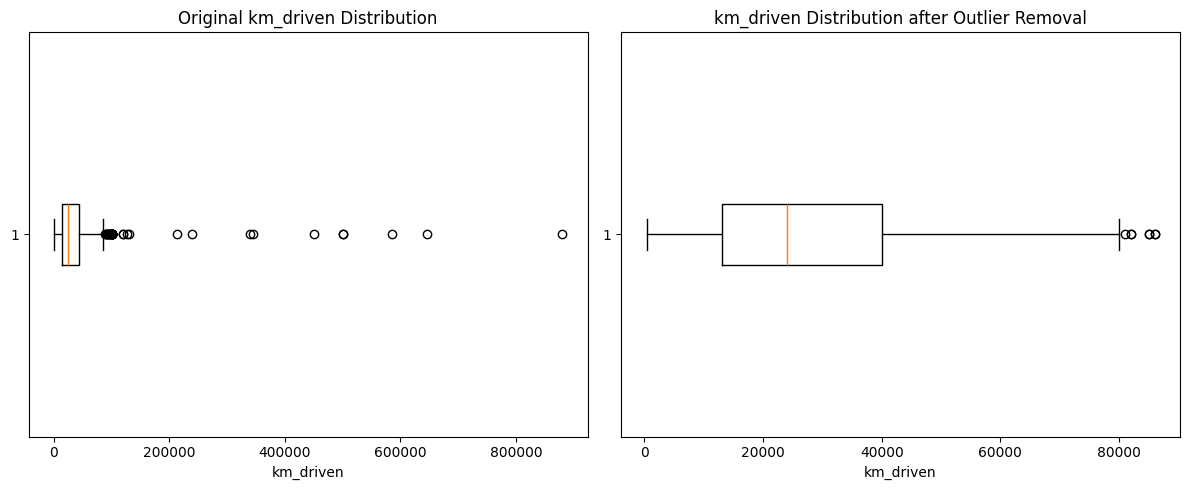

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].boxplot(df['km_driven'], vert=False)
axes[0].set_title('Original km_driven Distribution')
axes[0].set_xlabel('km_driven')

axes[1].boxplot(df_filtered['km_driven'], vert=False)
axes[1].set_title('km_driven Distribution after Outlier Removal')
axes[1].set_xlabel('km_driven')

plt.tight_layout()
plt.show()

###12.Perform a bivariate analysis to visualize the relationship between year and selling_price?

year             int64
selling_price    int64
dtype: object
year             0
selling_price    0
dtype: int64
              year  selling_price
count  1061.000000    1061.000000
mean   2013.867107   59638.151744
std       4.301191   56304.291973
min    1988.000000    5000.000000
25%    2011.000000   28000.000000
50%    2015.000000   45000.000000
75%    2017.000000   70000.000000
max    2020.000000  760000.000000


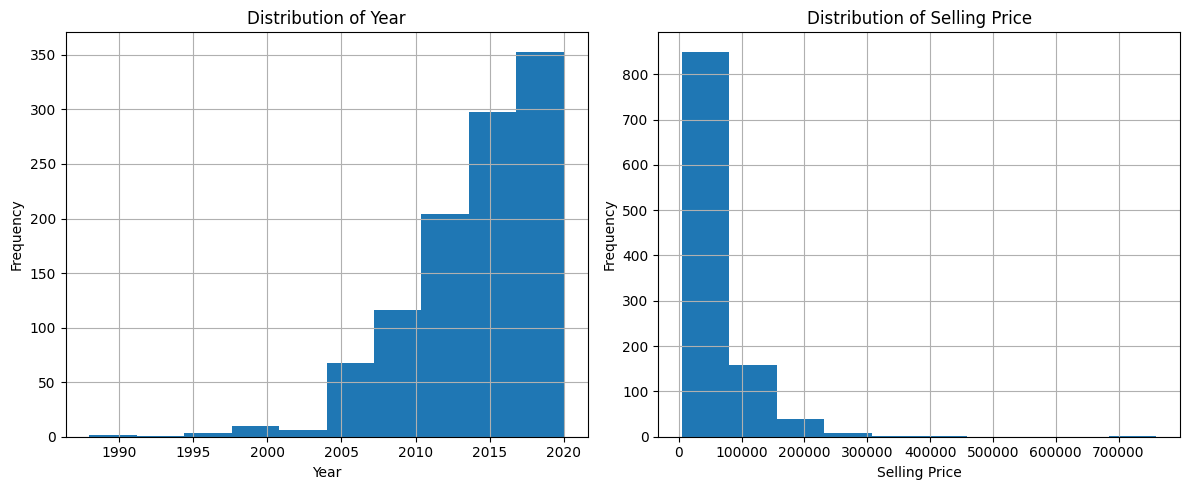

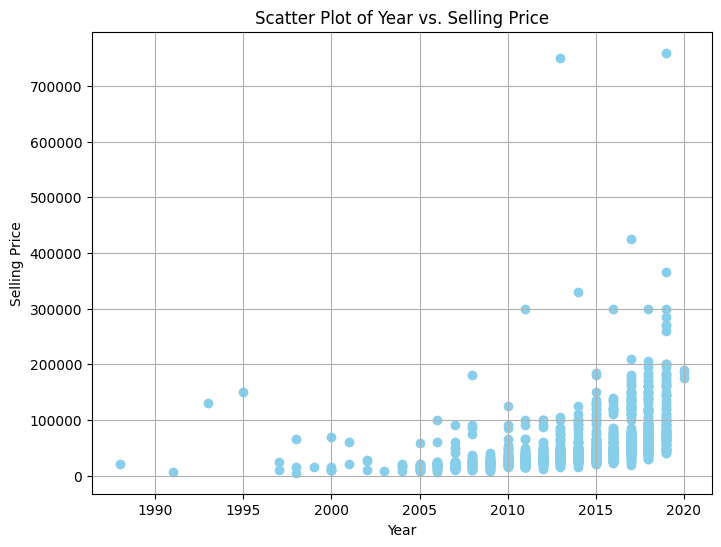

In [ ]:
import matplotlib.pyplot as plt

# Check data types and handle inconsistencies
print(df[['year', 'selling_price']].dtypes)

# Check for missing values and handle them
print(df[['year', 'selling_price']].isnull().sum())
# No missing values found, so no action is needed

# Analyze distributions
print(df[['year', 'selling_price']].describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['year'].hist()
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df['selling_price'].hist()
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['year'], df['selling_price'], color='skyblue')
plt.title('Scatter Plot of Year vs. Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

###13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing yearZ)?


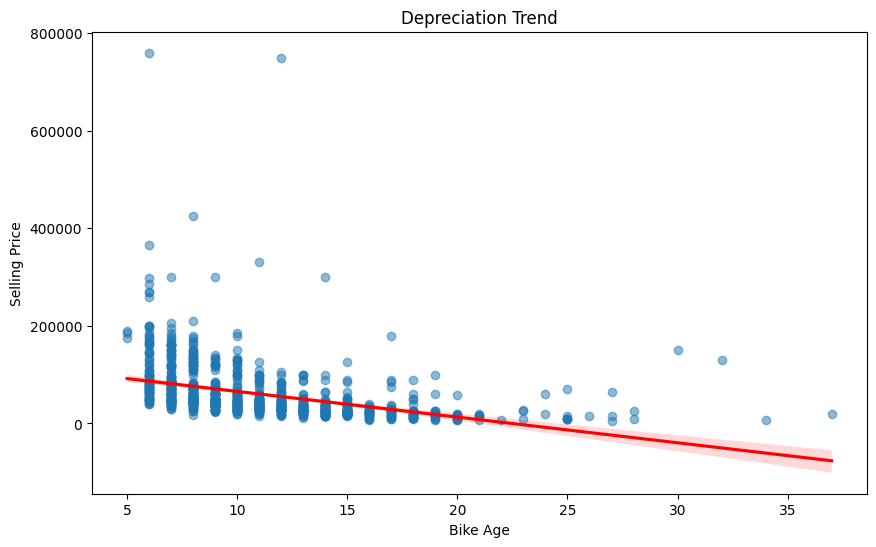

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Drop rows with NaN selling prices
df_plot = df.dropna(subset=['selling_price'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='bike_age', y='selling_price', data=df_plot, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Customize the plot
plt.xlabel("Bike Age")
plt.ylabel("Selling Price")
plt.title("Depreciation Trend")
plt.show()

###14.Which bike names are priced significantly above the average price for their manufacturing year?

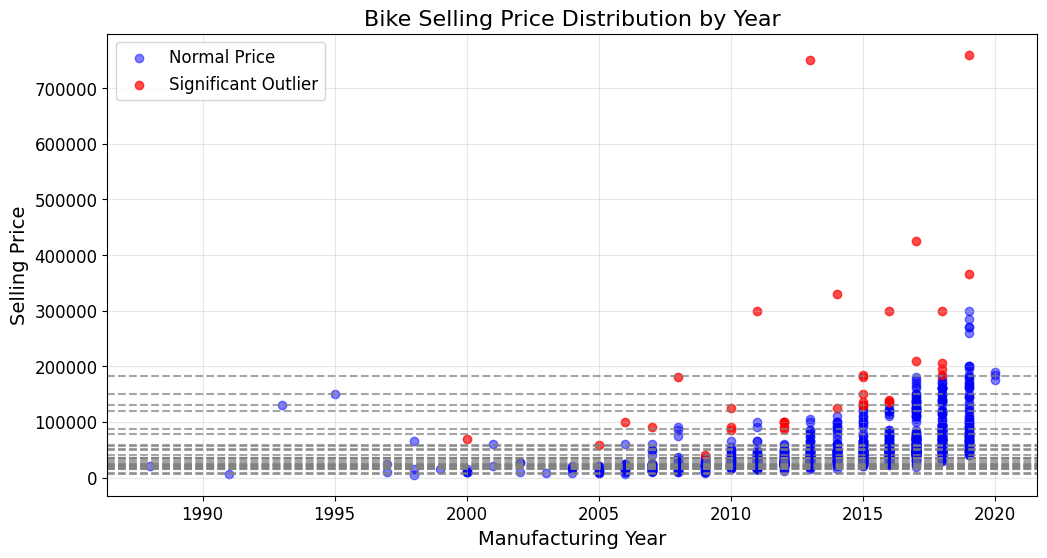

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(df[~df['is_significant_outlier']]['year'], df[~df['is_significant_outlier']]['selling_price'], color='blue', label='Normal Price', alpha=0.5)
plt.scatter(df[df['is_significant_outlier']]['year'], df[df['is_significant_outlier']]['selling_price'], color='red', label='Significant Outlier', alpha=0.7)

for year in year_stats.index:
    plt.axhline(y=year_stats.loc[year, 'mean'], color='gray', linestyle='--', alpha=0.7)


plt.title('Bike Selling Price Distribution by Year', fontsize=16)
plt.xlabel('Manufacturing Year', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

###15. Develop a correlation matrix for numeric columns and visualize it using a heatmap?

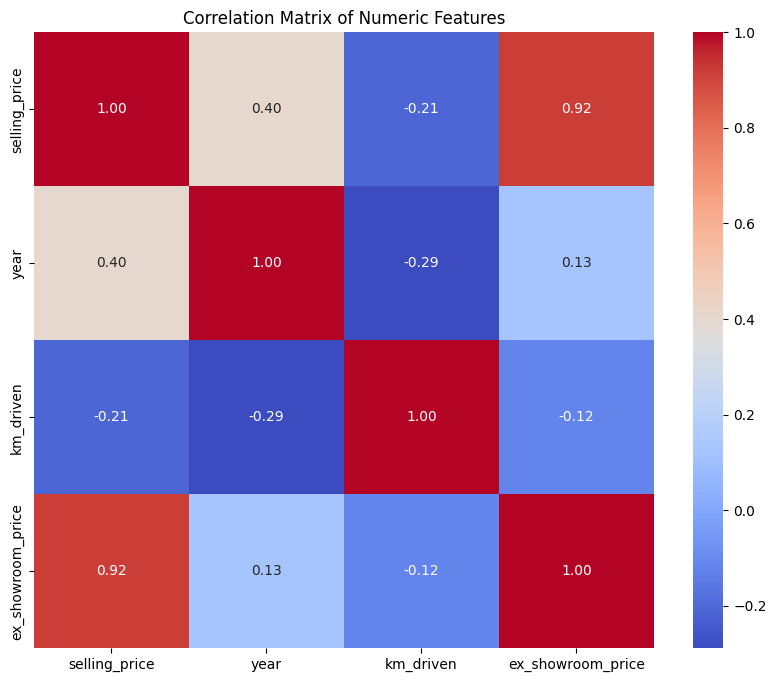

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

#**EDA-2** ⭐

###1.What is the average selling price of cars for each dealer, and how does it compare across different dealers?

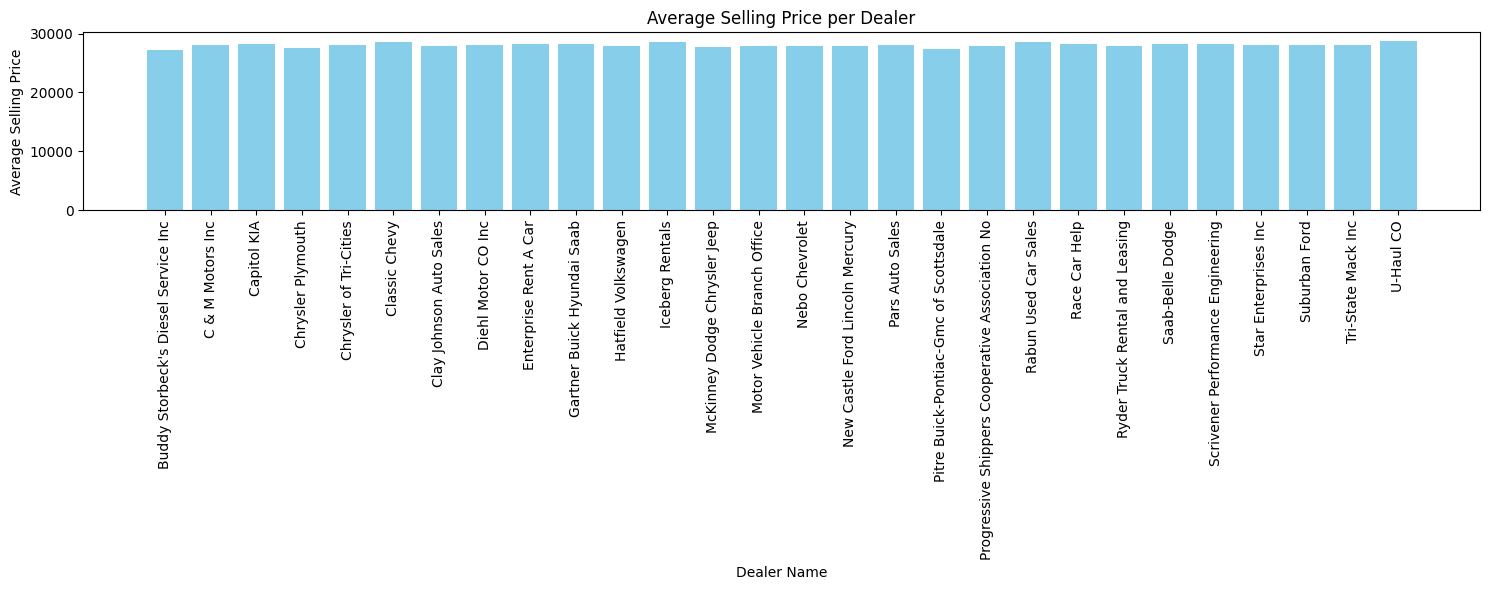

In [ ]:
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(15, 6))  # Adjust figure size for better readability
plt.bar(average_prices['Dealer_Name'], average_prices['Average_Price'], color='skyblue')
plt.xlabel('Dealer Name')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price per Dealer')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

###2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trend?
>


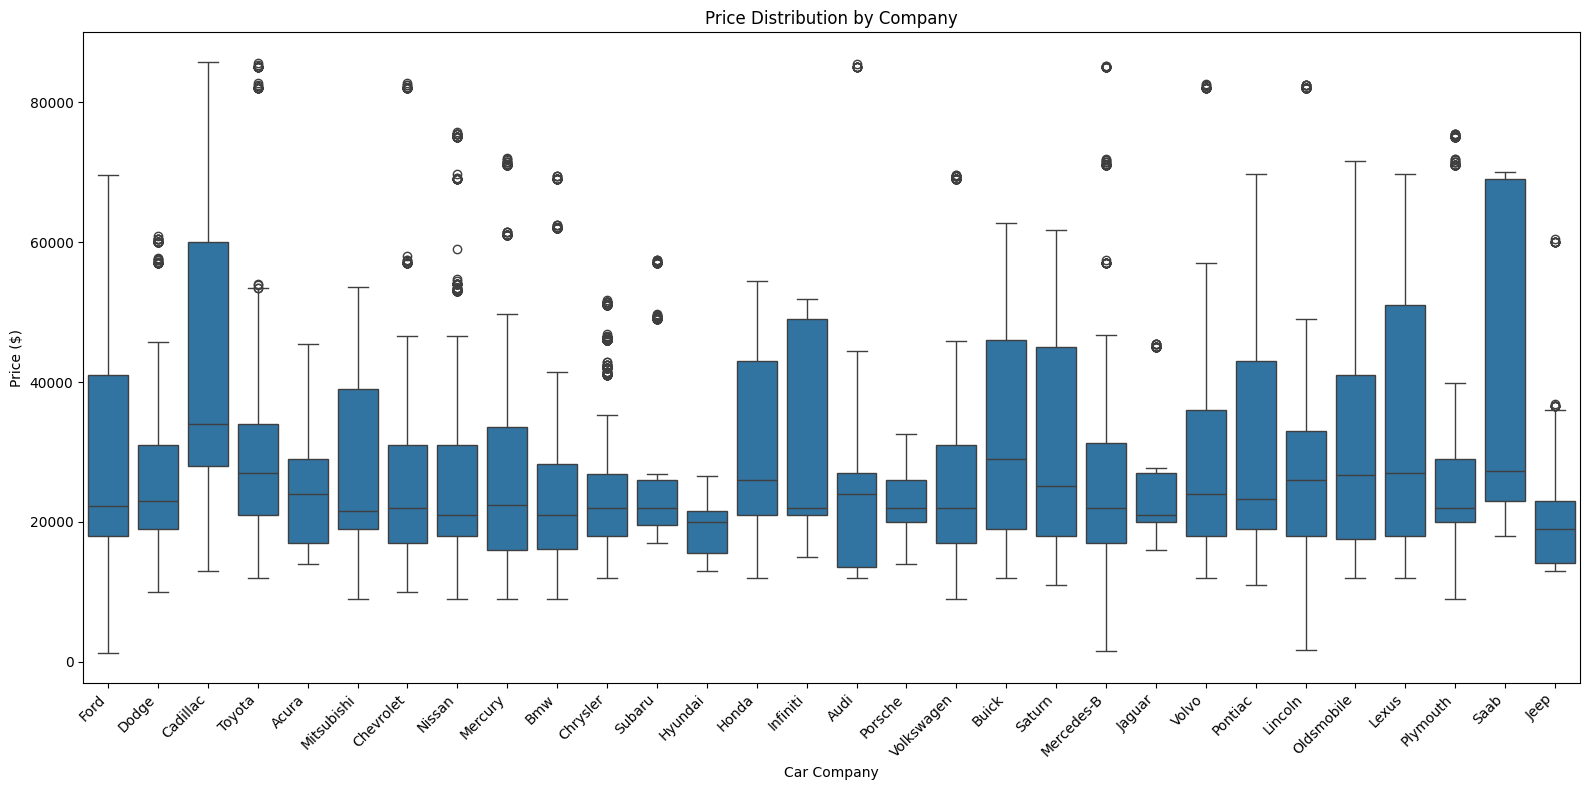

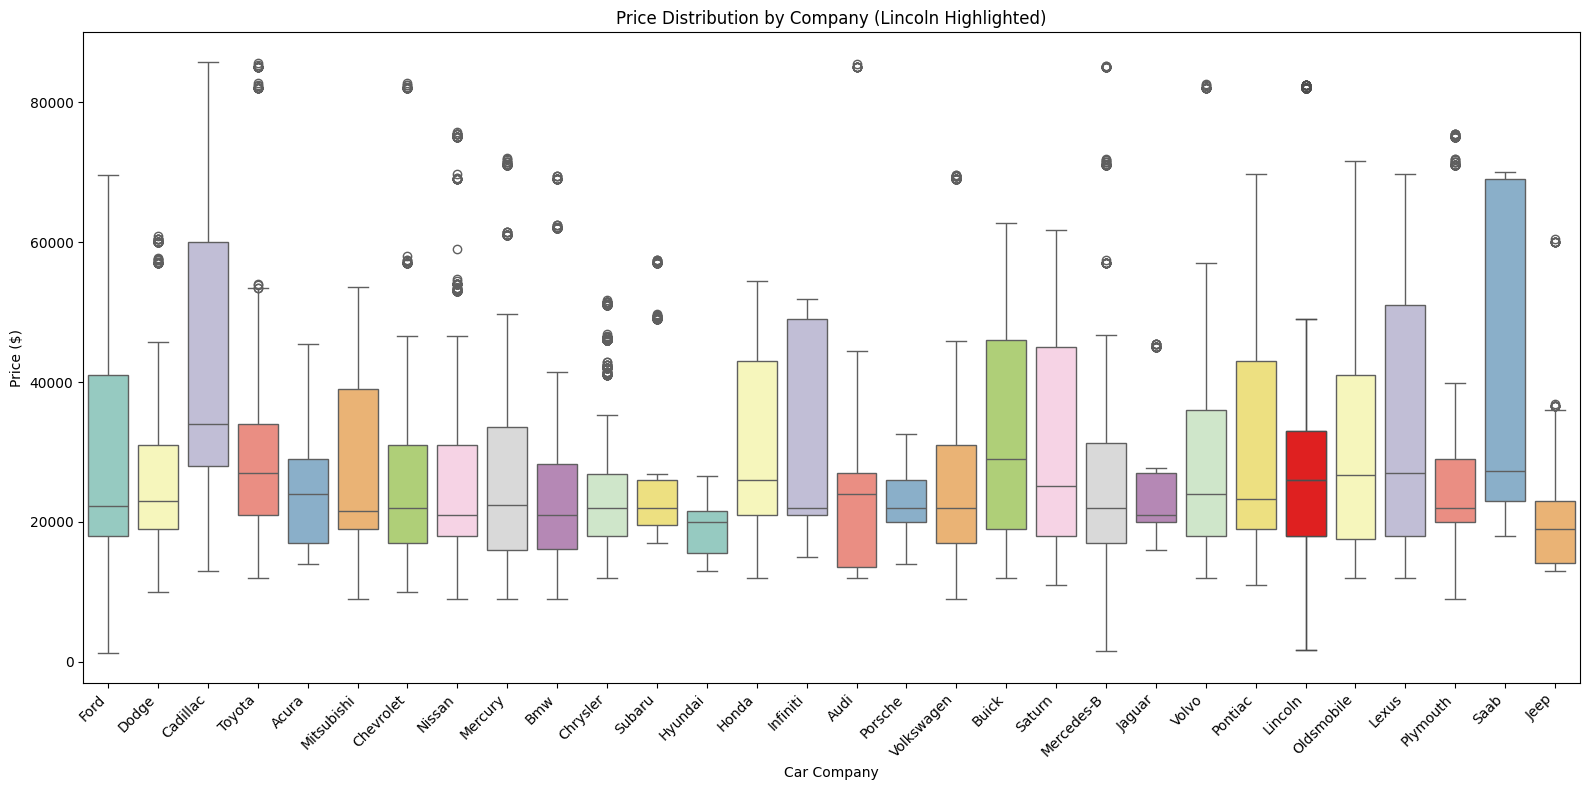

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
sns.boxplot(x='Company', y='Price ($)', data=df)
plt.title('Price Distribution by Company')
plt.xlabel('Car Company')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#Highlight Lincoln with a different color
plt.figure(figsize=(16, 8))
sns.boxplot(x='Company', y='Price ($)', data=df, hue='Company', palette="Set3", legend=False) # fix the warning
ax = sns.boxplot(x='Company', y='Price ($)', data=df[df['Company'] == 'Lincoln'], color='red')
plt.title('Price Distribution by Company (Lincoln Highlighted)')
plt.xlabel('Car Company')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges Compare?

<ipython-input-6-d1d2795b9da0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dealer_Region', y='Price ($)', data=df_cleaned, palette="Set3")


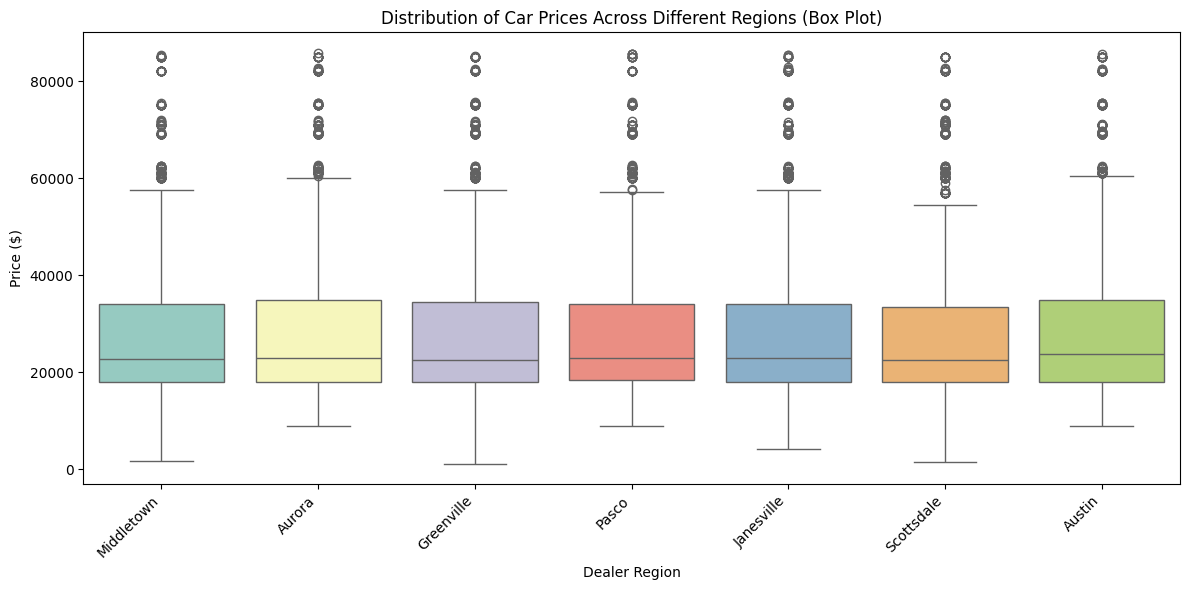

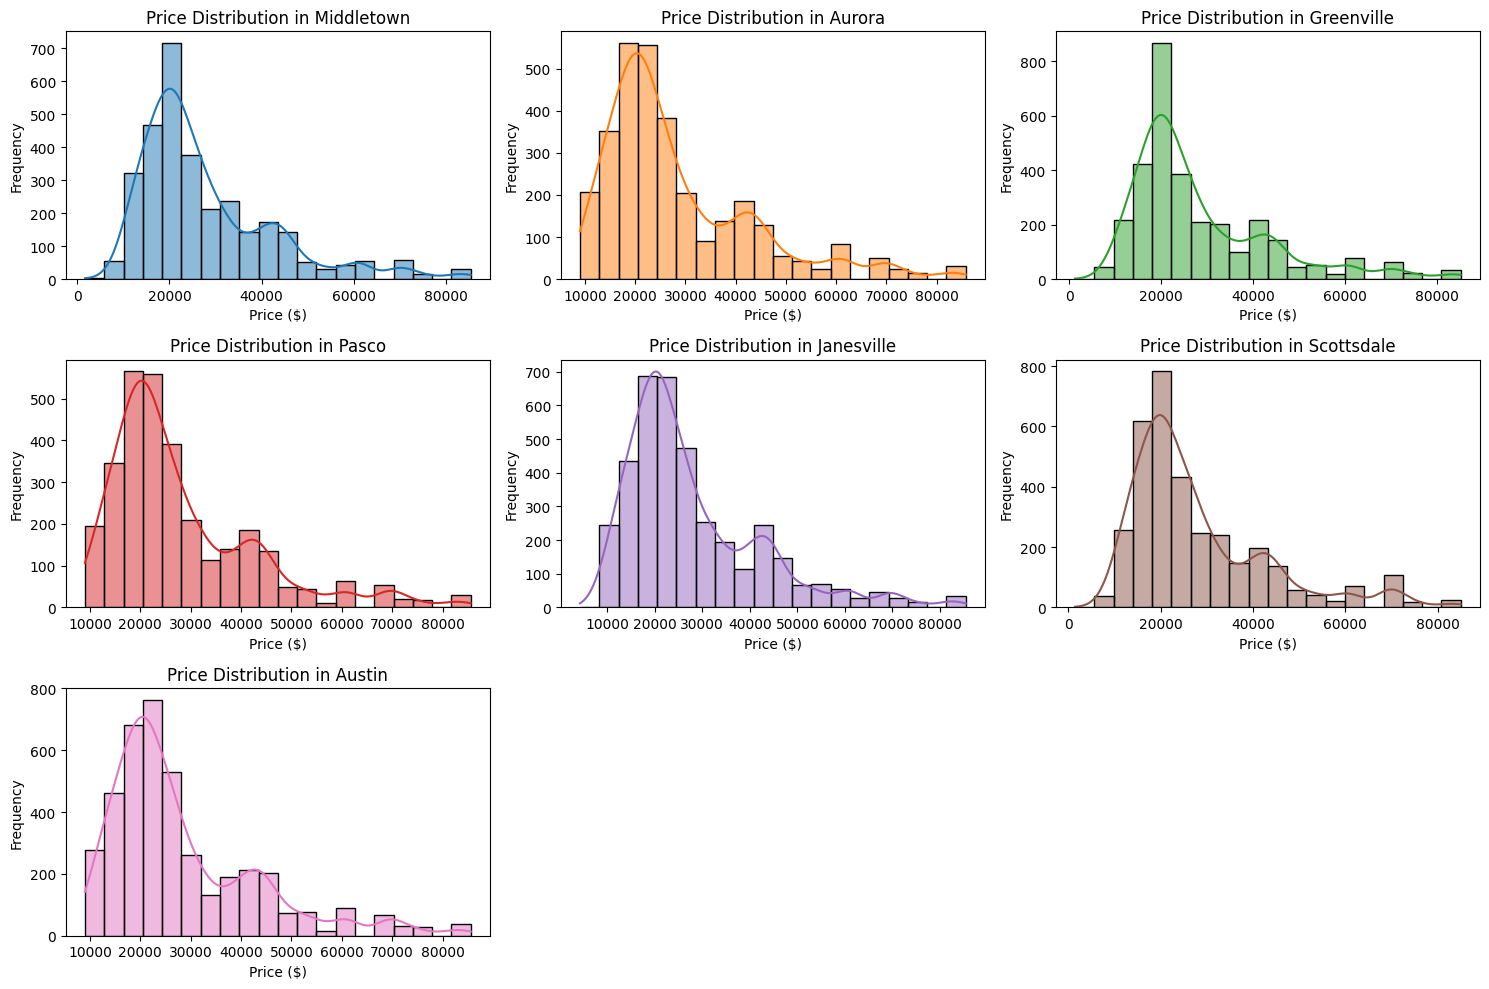

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df_cleaned, palette="Set3")
plt.title('Distribution of Car Prices Across Different Regions (Box Plot)')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('box_plot_car_prices.png')
plt.show()

# Histograms
plt.figure(figsize=(15, 10))
for i, region in enumerate(df_cleaned['Dealer_Region'].unique()):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_cleaned[df_cleaned['Dealer_Region'] == region]['Price ($)'], bins=20, kde=True, color=f'C{i}')
    plt.title(f'Price Distribution in {region}')
    plt.xlabel('Price ($)')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('histograms_car_prices.png')
plt.show()

###5.What is the distribution of cars based on body styles?

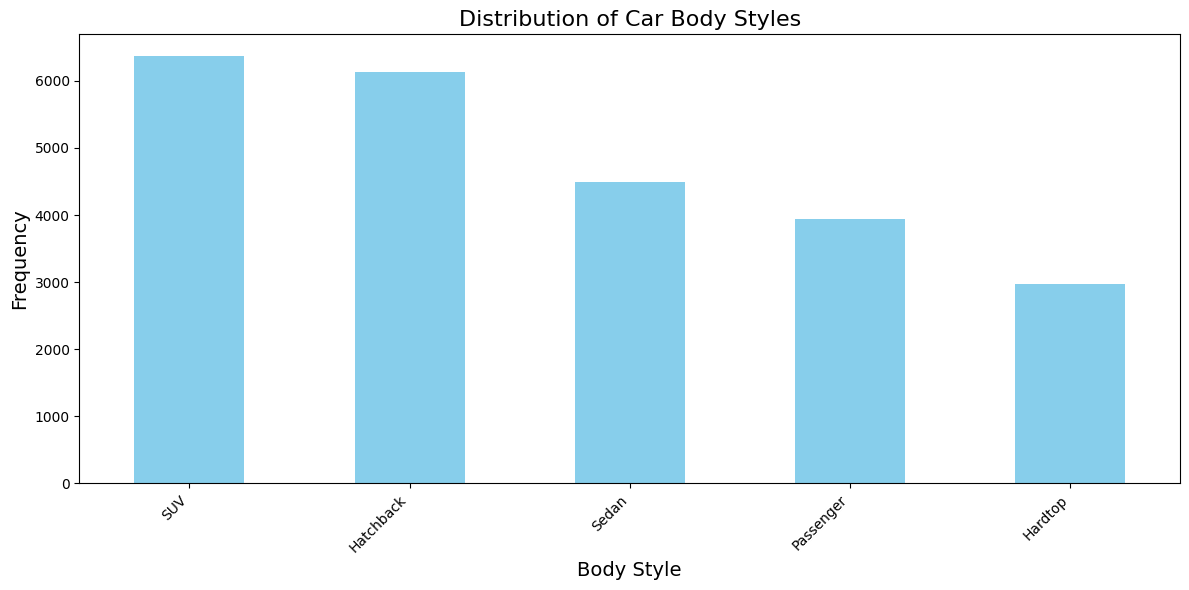

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
body_style_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Car Body Styles', fontsize=16)
plt.xlabel('Body Style', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.savefig('car_body_style_distribution.png')
plt.show()

###6.How does the average selling price of cars vary by customer gender and annual income?

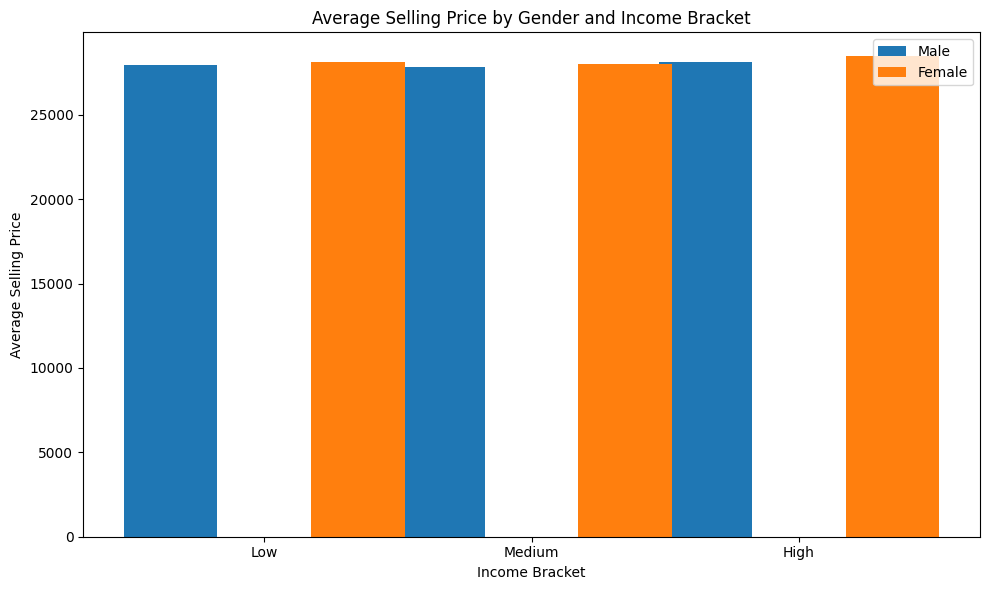

In [ ]:
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
income_brackets = average_prices['Income Bracket'].unique()
index = range(len(income_brackets))

for gender in ['Male', 'Female']:
    gender_prices = average_prices[average_prices['Gender'] == gender]['Price ($)'].values
    plt.bar([i + (0.35 if gender == 'Female' else -0.35) for i in index], gender_prices, bar_width, label=gender)


plt.xlabel('Income Bracket')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Gender and Income Bracket')
plt.xticks(index, income_brackets)
plt.legend()
plt.tight_layout()
plt.savefig('average_price_visualization.png')
plt.show()

###7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

<ipython-input-7-f441a7f96269>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Region'] == region]['Price ($)'] for region in region_summary.index], labels=region_summary.index, patch_artist=True)


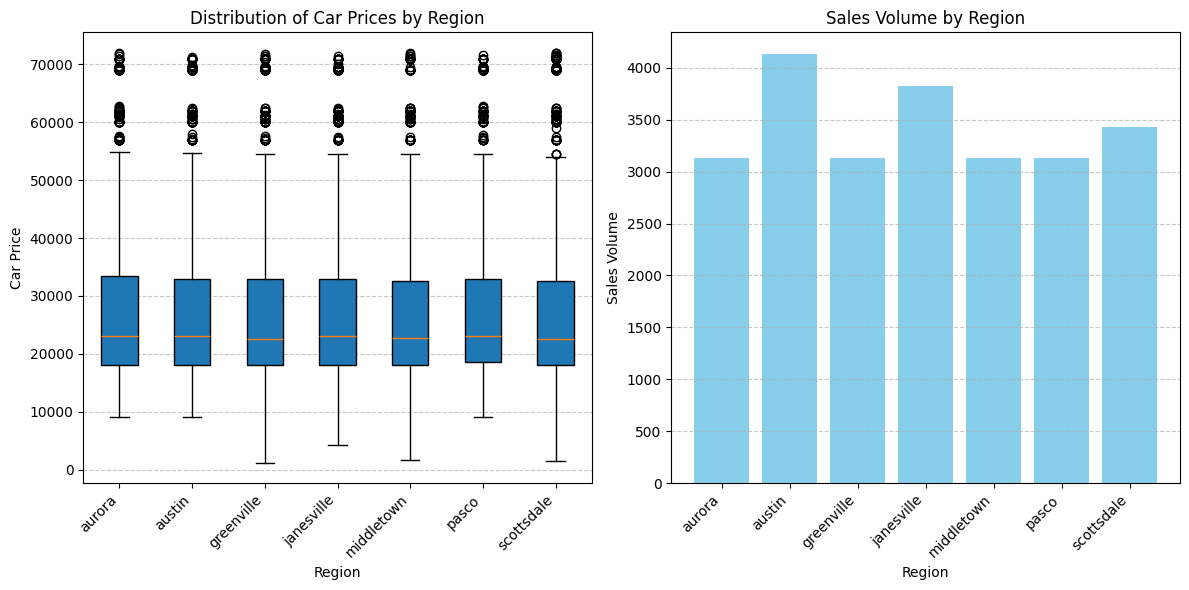

In [ ]:
import matplotlib.pyplot as plt

# Create box plot for car prices by region
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot([df[df['Region'] == region]['Price ($)'] for region in region_summary.index], labels=region_summary.index, patch_artist=True)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Region')
plt.ylabel('Car Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Create bar chart for sales volume by region
plt.subplot(1, 2, 2)
plt.bar(region_summary.index, region_summary['sales_volume'], color='skyblue')
plt.title('Sales Volume by Region')
plt.xlabel('Region')
plt.ylabel('Sales Volume')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()

###8.How does the average car price differ between cars with different engine sizes?

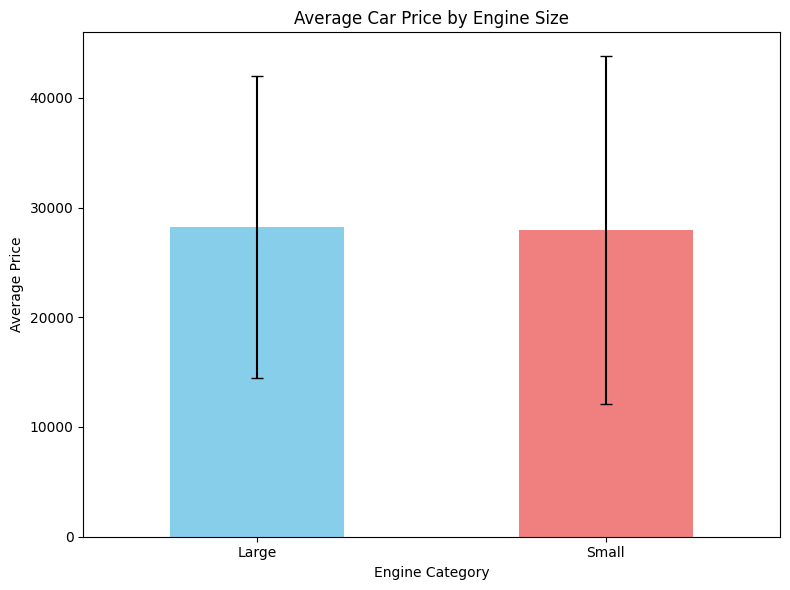

In [ ]:
import matplotlib.pyplot as plt

# Group data by 'Engine Category' and calculate statistics
engine_price_stats = df.groupby('Engine Category')['Price ($)'].agg(['mean', 'std'])

# Create the bar chart
plt.figure(figsize=(8, 6))
engine_price_stats['mean'].plot(kind='bar', yerr=engine_price_stats['std'], capsize=4, color=['skyblue', 'lightcoral'])
plt.xlabel("Engine Category")
plt.ylabel("Average Price")
plt.title("Average Car Price by Engine Size")
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()
plt.show()

###9.How do car prices vary based on the customer’s annual income bracket?

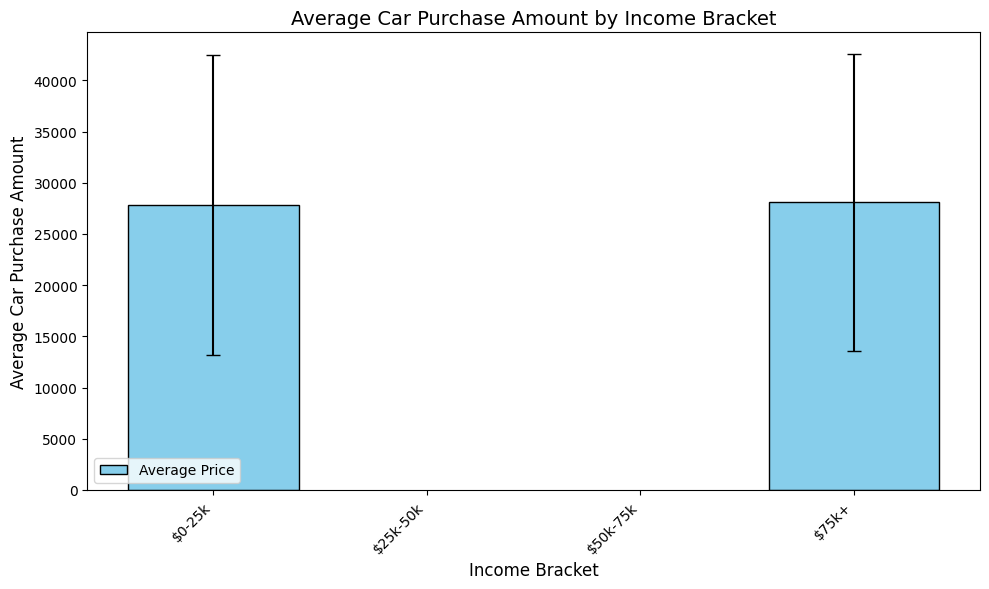

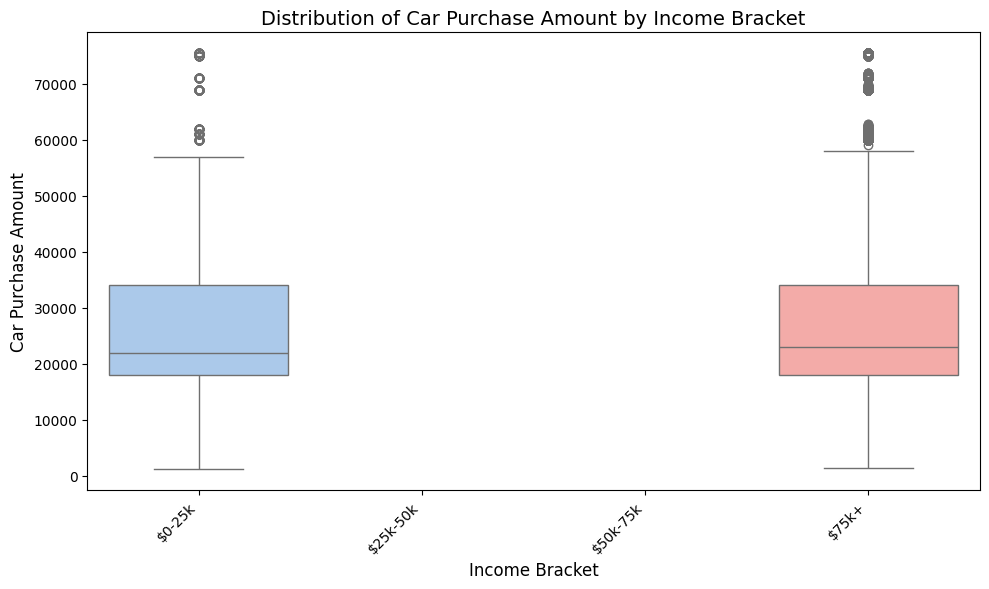

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by income bracket and calculate the average car price and standard deviation
average_prices = df.groupby('Income Bracket')['Price ($)'].mean()
std_dev_prices = df.groupby('Income Bracket')['Price ($)'].std()

# Create the bar chart with error bars
plt.figure(figsize=(10, 6))
plt.bar(average_prices.index, average_prices.values, yerr=std_dev_prices.values, capsize=5, color='skyblue', edgecolor='black', label='Average Price')
plt.xlabel("Income Bracket", fontsize=12)
plt.ylabel("Average Car Purchase Amount", fontsize=12)
plt.title("Average Car Purchase Amount by Income Bracket", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income Bracket', y='Price ($)', data=df, palette='pastel')
plt.xlabel("Income Bracket", fontsize=12)
plt.ylabel("Car Purchase Amount", fontsize=12)
plt.title("Distribution of Car Purchase Amount by Income Bracket", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###10.What are the top 5 car models with the highest number of sales, and how does their price distribution look?

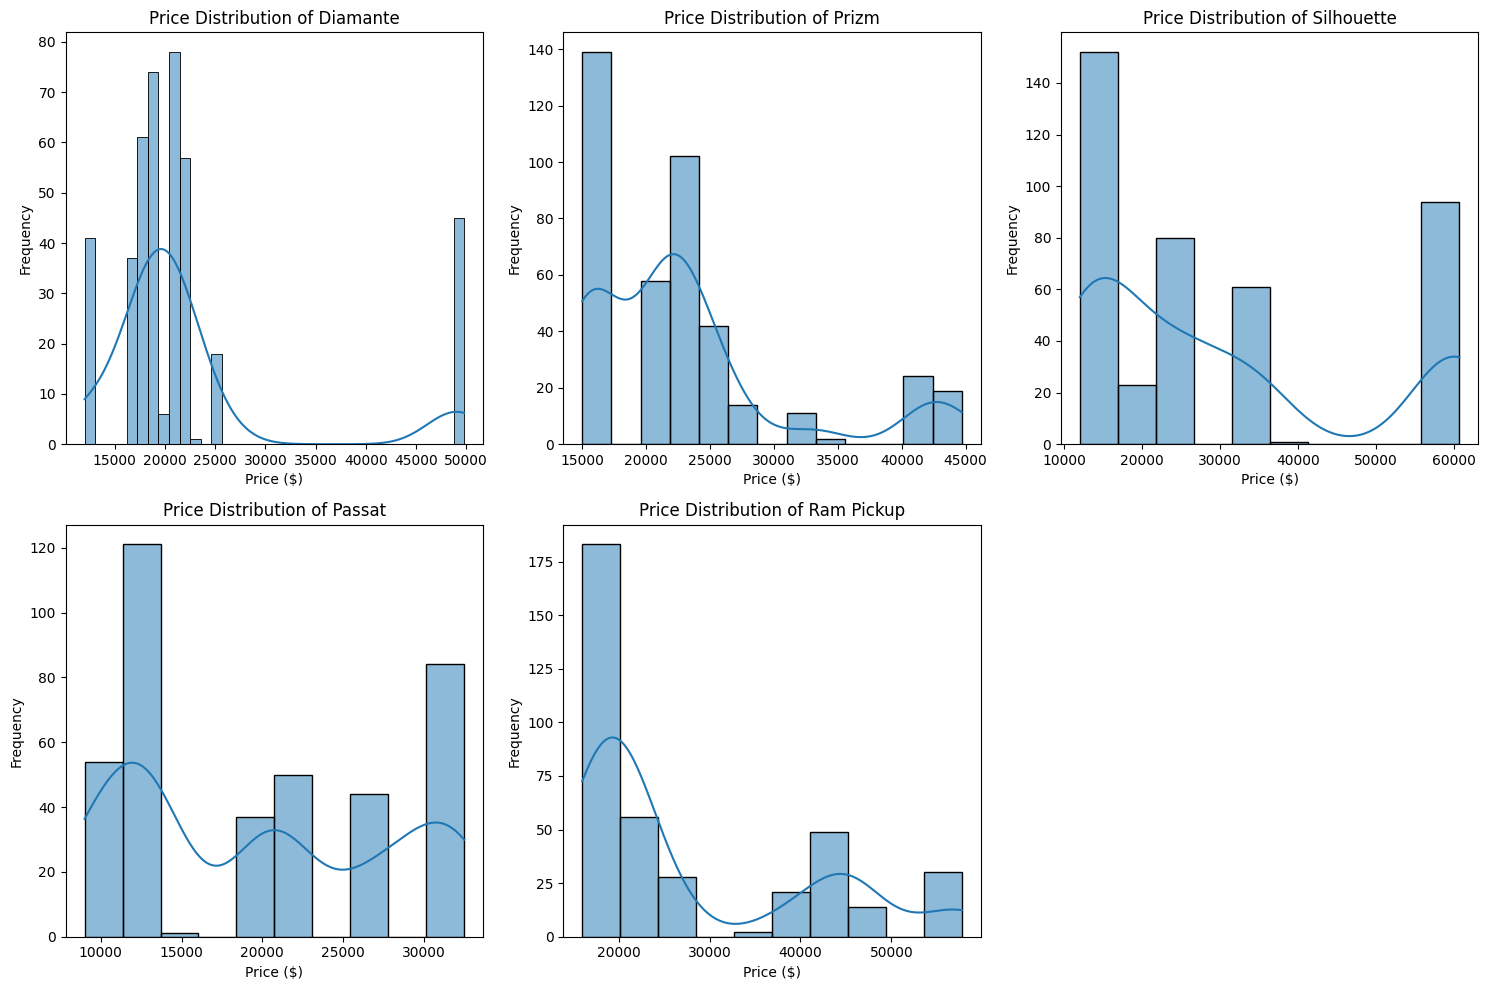

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

top_5_models = sales_df['Model'].head(5).tolist()

for i, model in enumerate(top_5_models):
    plt.subplot(2, 3, i + 1)
    sns.histplot(top_5_df[top_5_df['Model'] == model]['Price ($)'], kde=True)
    plt.title(f'Price Distribution of {model}')
    plt.xlabel('Price ($)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

###11.How does car price vary with engine size across different car colors, and which colors have the highest price variation?


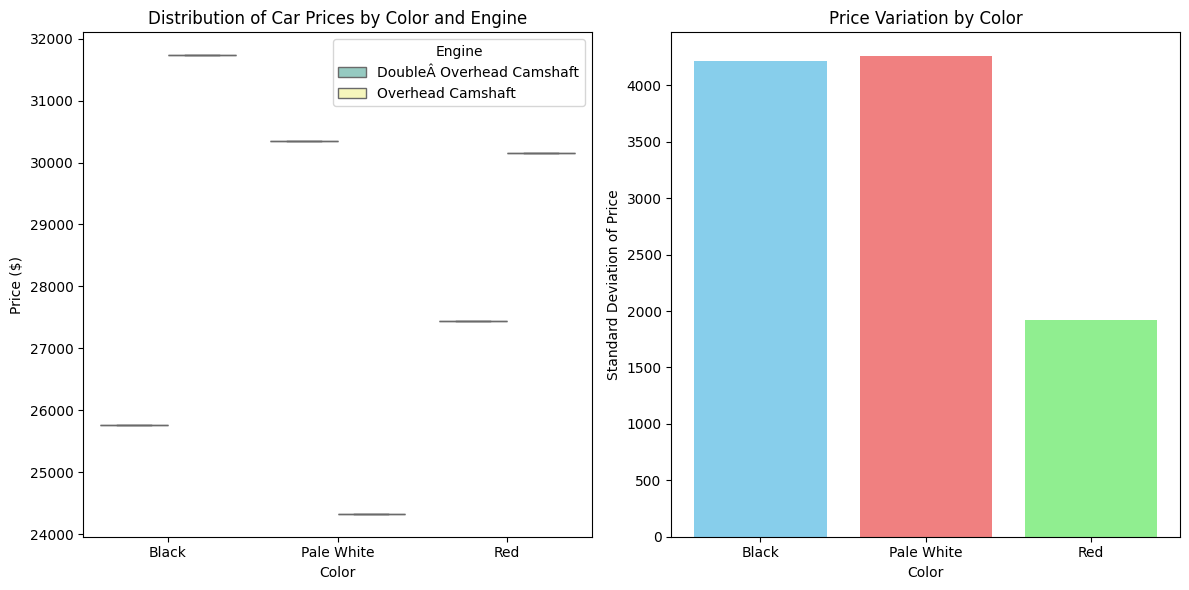

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1,2,1)
ax1 = sns.boxplot(x='Color', y='Price ($)', hue='Engine', data=df_grouped, palette="Set3")
ax1.set_title('Distribution of Car Prices by Color and Engine')
ax1.set_xlabel('Color')
ax1.set_ylabel('Price ($)')

# Bar chart of price variation
plt.subplot(1,2,2)
price_variation = df_grouped.groupby('Color')['Price ($)'].std()
plt.bar(price_variation.index, price_variation.values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Price Variation by Color')
plt.xlabel('Color')
plt.ylabel('Standard Deviation of Price')

plt.tight_layout()
plt.show()

###12.Is there any seasonal trend in car sales based on the date of sale?

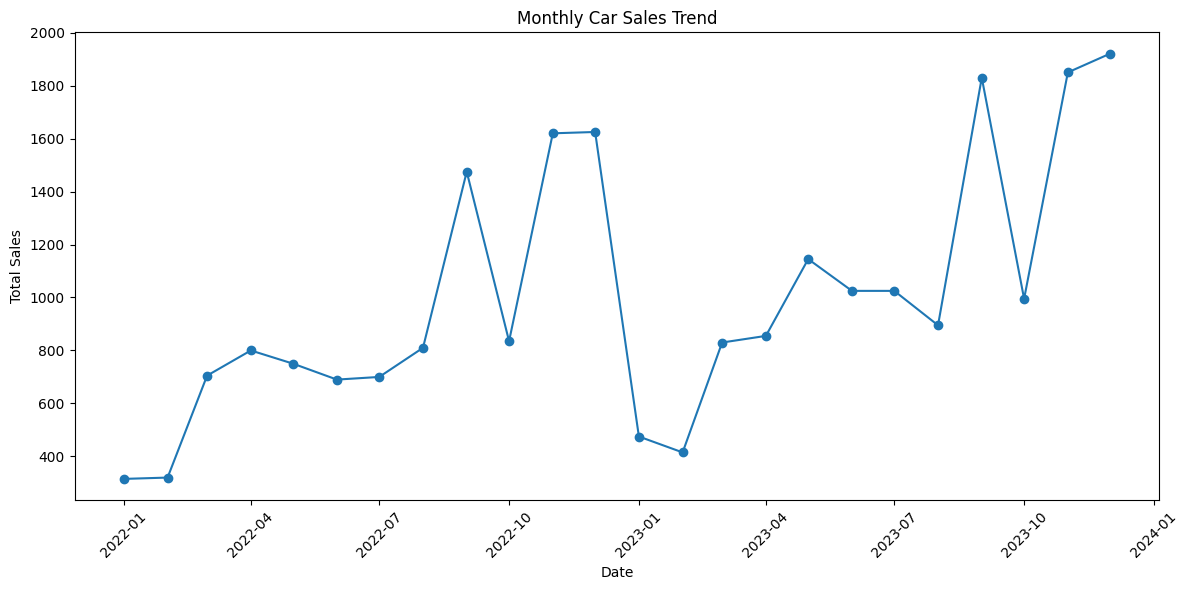

<ipython-input-6-5b7311313bcc>:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([monthly_sales.loc[monthly_sales['Month'] == i, 'Total_Sales'] for i in range(1, 13)],


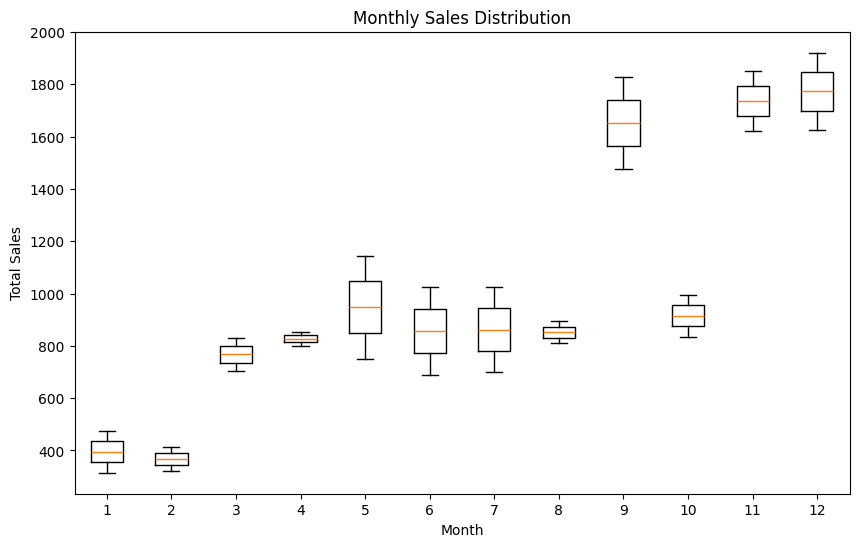

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Year' and 'Month' to datetime objects
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

# 1. Line plot of total sales over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Total_Sales'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Monthly Car Sales Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Box plot of sales for each month
plt.figure(figsize=(10, 6))
plt.boxplot([monthly_sales.loc[monthly_sales['Month'] == i, 'Total_Sales'] for i in range(1, 13)],
            labels=range(1, 13))  # Labels for each month (1-12)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Distribution')
plt.show()

###13.How does the car price distribution change when considering different combinations of body style and transmission type?


<ipython-input-8-03bccb0eed47>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=price_stats.index, y=price_stats['mean'], palette="Set3")
<ipython-input-8-03bccb0eed47>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=price_stats.index, y=price_stats['median'], palette="Set2")


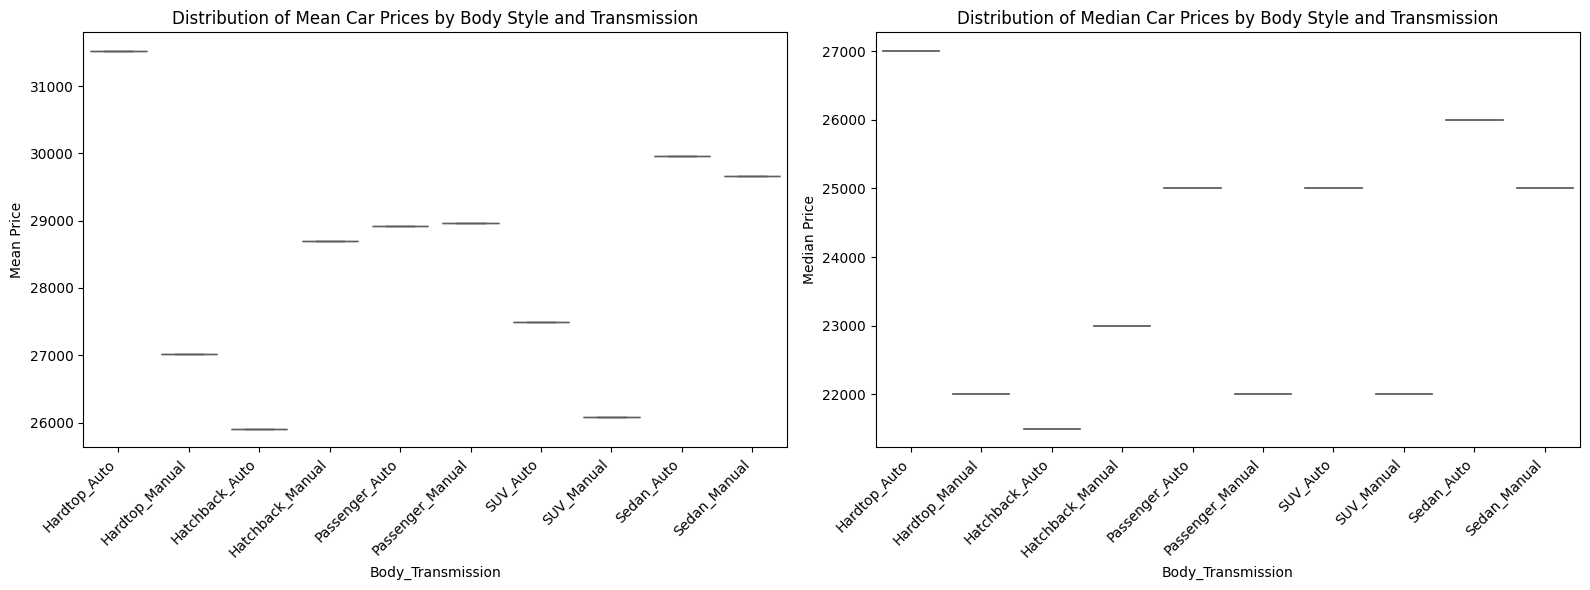

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=price_stats.index, y=price_stats['mean'], palette="Set3")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Body_Transmission')
plt.ylabel('Mean Price')
plt.title('Distribution of Mean Car Prices by Body Style and Transmission')

plt.subplot(1, 2, 2)
sns.violinplot(x=price_stats.index, y=price_stats['median'], palette="Set2")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Body_Transmission')
plt.ylabel('Median Price')
plt.title('Distribution of Median Car Prices by Body Style and Transmission')

plt.tight_layout()
plt.show()

###14.What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?


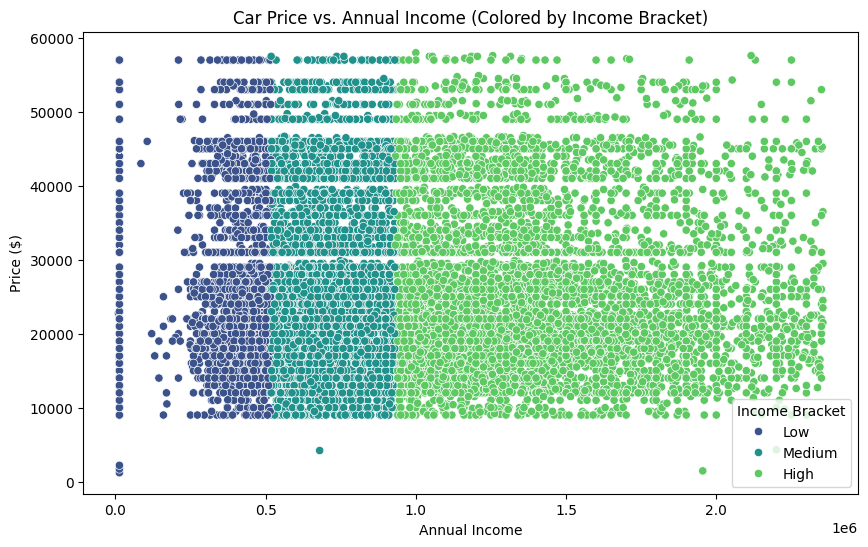

<ipython-input-7-6aa8aee4569a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Income Bracket', y='Price ($)', data=df, palette='pastel')


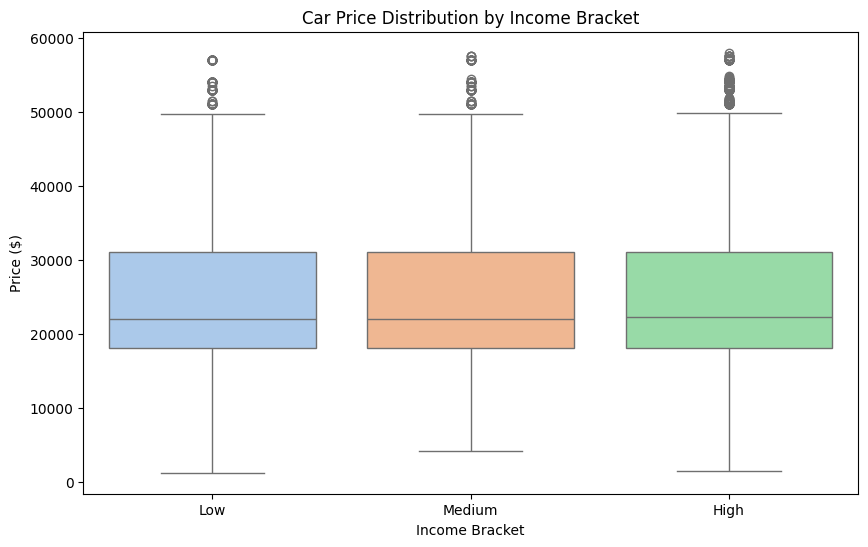

<ipython-input-7-6aa8aee4569a>:22: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  correlation_matrix = df.pivot_table(index='Income Bracket', values=['Price ($)', 'Annual Income'], aggfunc='mean').corr()


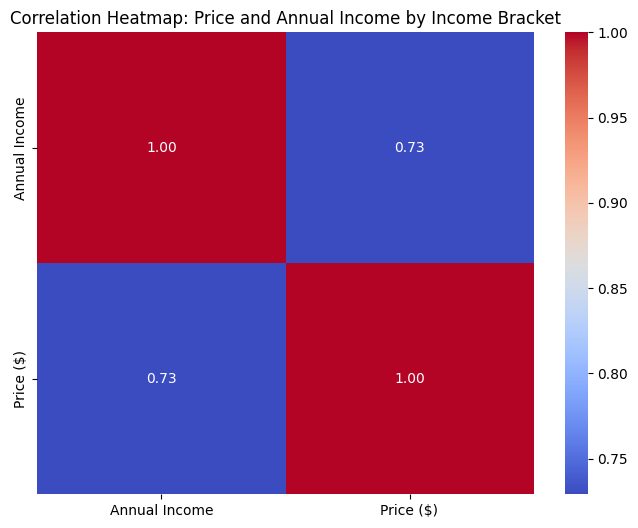

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', hue='Income Bracket', data=df, palette='viridis')
plt.title('Car Price vs. Annual Income (Colored by Income Bracket)')
plt.xlabel('Annual Income')
plt.ylabel('Price ($)')
plt.show()

# 2. Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income Bracket', y='Price ($)', data=df, palette='pastel')
plt.title('Car Price Distribution by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Price ($)')
plt.show()

# 3. Heatmap
# Calculate the correlation matrix
correlation_matrix = df.pivot_table(index='Income Bracket', values=['Price ($)', 'Annual Income'], aggfunc='mean').corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Price and Annual Income by Income Bracket')
plt.show()

###15.How does the average car price vary across different car models and engine types?

<Figure size 2000x800 with 0 Axes>

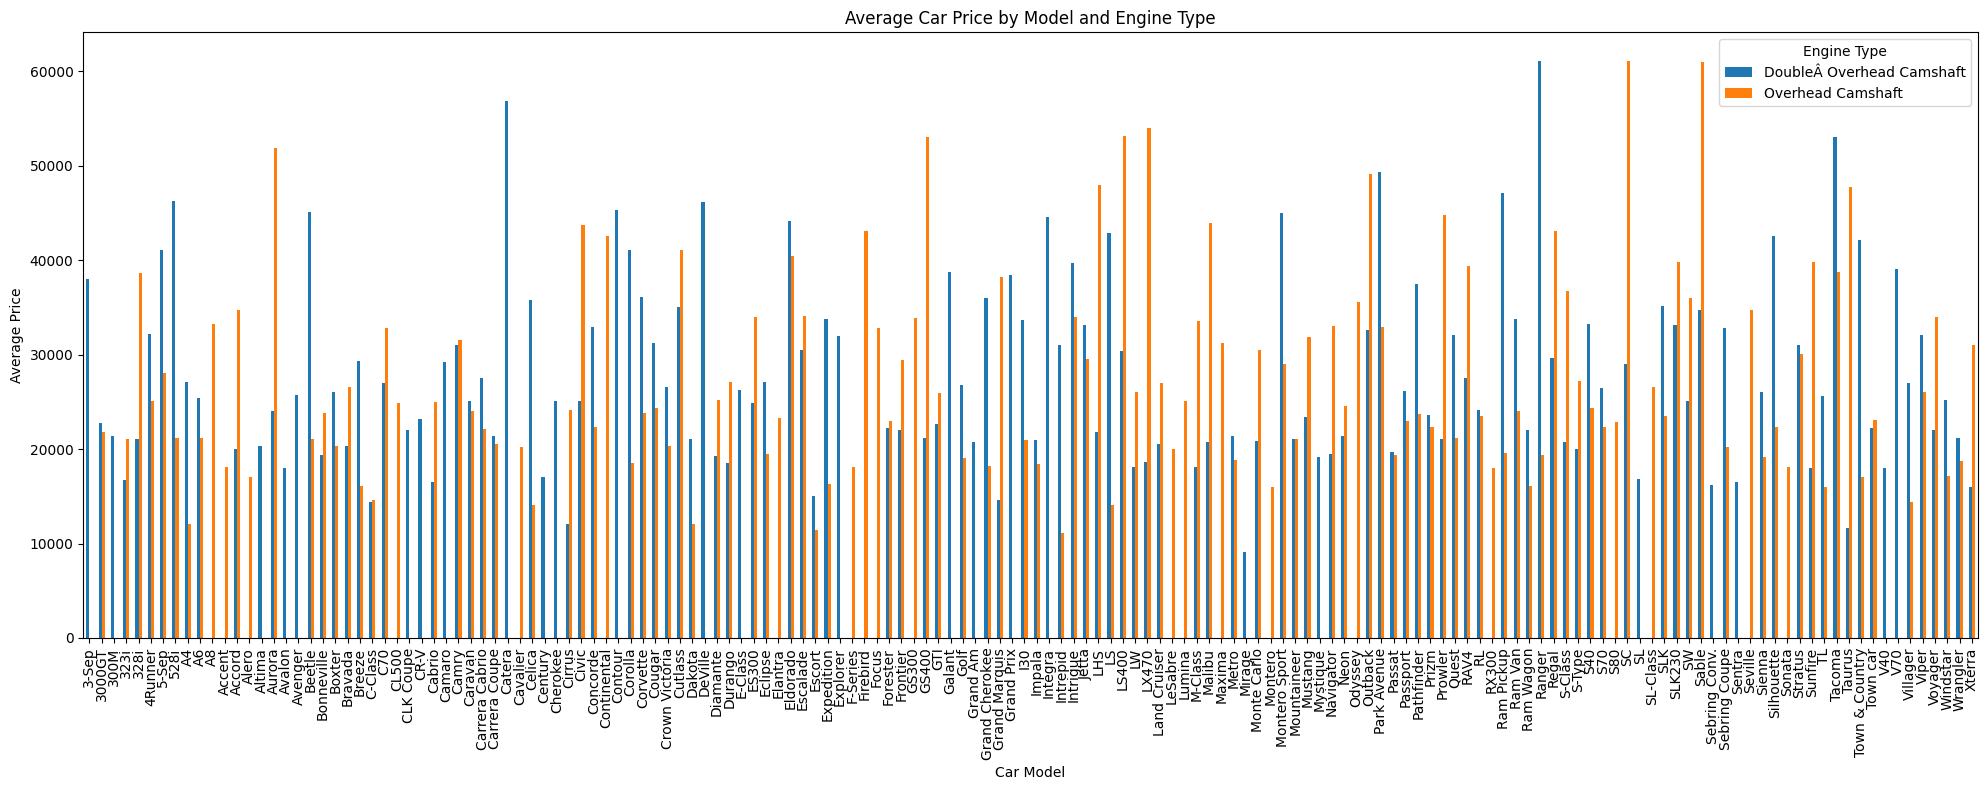

In [ ]:
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(20, 8))  # Adjust figure size for better readability
ax = df_avg_price.groupby(['Model', 'Engine'])['Average Price'].mean().unstack().plot(kind='bar', figsize=(20, 8))
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.xlabel("Car Model")
plt.ylabel("Average Price")
plt.title("Average Car Price by Model and Engine Type")
plt.legend(title="Engine Type")
plt.tight_layout()
plt.savefig("average_price_by_model_engine.png")
plt.show()

#**EDA 3** ⭐

###1.What is the average rating for each product category?

<ipython-input-7-1c42818a113d>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent labels from overlapping


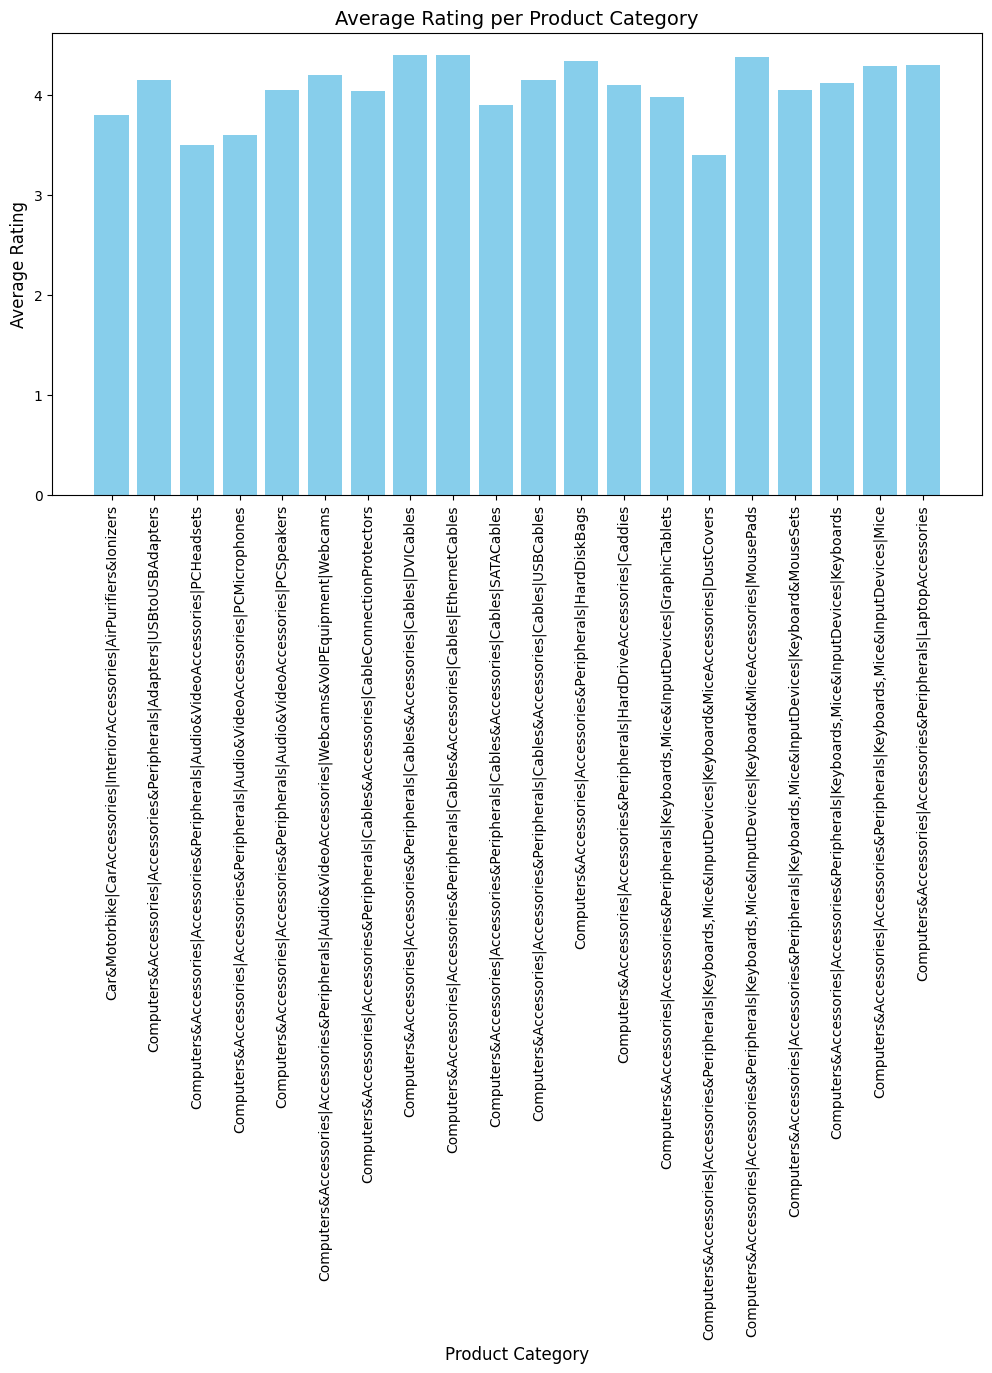

In [ ]:
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
plt.bar(df_avg_rating['category'].head(20), df_avg_rating['average_rating'].head(20), color='skyblue')
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Average Rating per Product Category", fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Save the chart
plt.savefig("average_rating_per_category.png")

# Display the chart
plt.show()

###2.What are the top rating_count products by category?

<ipython-input-9-82e74f2ff35f>:17: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(pad=1.0) # Adjust subplot params for a tight layout


ValueError: num must be an integer with 1 <= num <= 28, not 29

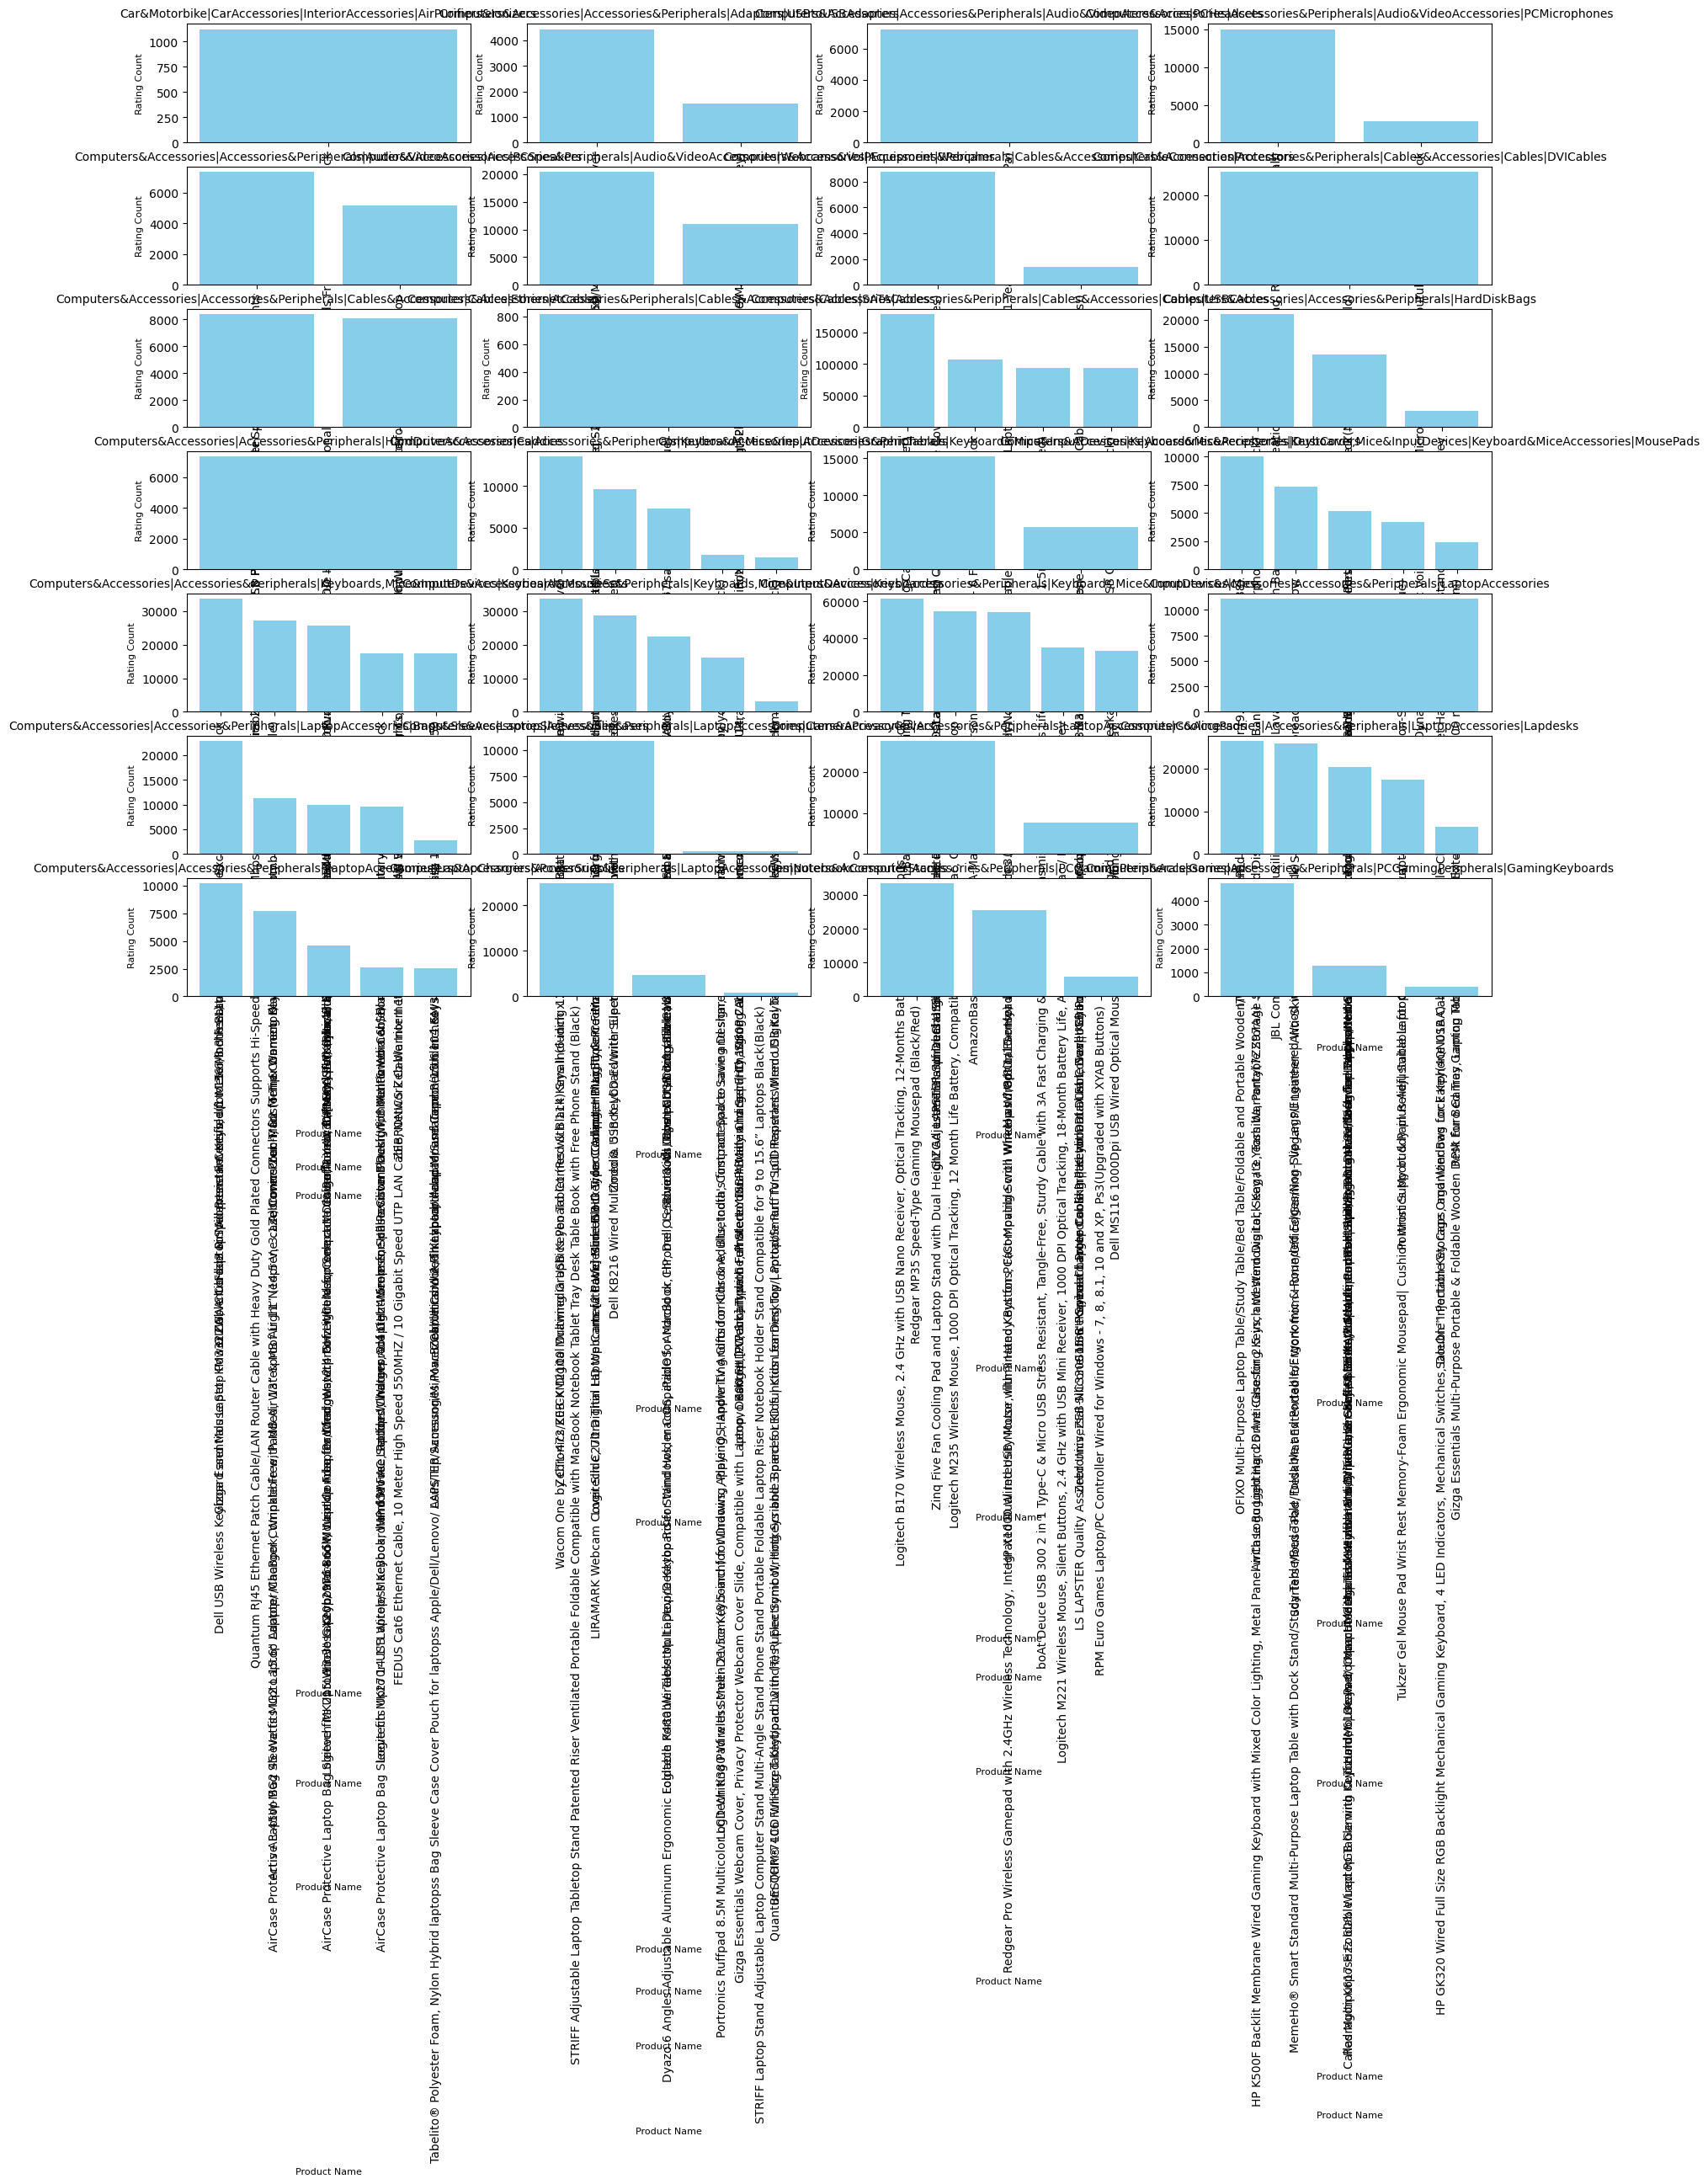

In [ ]:
import matplotlib.pyplot as plt

# Group the data by category and get the top 5 products
grouped_products = top_products.groupby('category')

# Adjust the figure size for better visualization
plt.figure(figsize=(20, 15))

# Iterate through each category and plot its top 5 products
for i, (category, group) in enumerate(grouped_products):
    ax = plt.subplot(7, 4, i+1)  # Adjust the grid layout as needed
    ax.bar(group['product_name'], group['rating_count'], color='skyblue')
    plt.xticks(rotation=90)
    plt.title(category, fontsize=10)  # Adjust title font size
    plt.xlabel('Product Name', fontsize=8)
    plt.ylabel('Rating Count', fontsize=8)
    plt.tight_layout(pad=1.0) # Adjust subplot params for a tight layout

plt.suptitle('Top 5 Products by Rating Count for Each Category', fontsize=16)
plt.show()

###3.What is the distribution of discounted prices vs. actual prices?

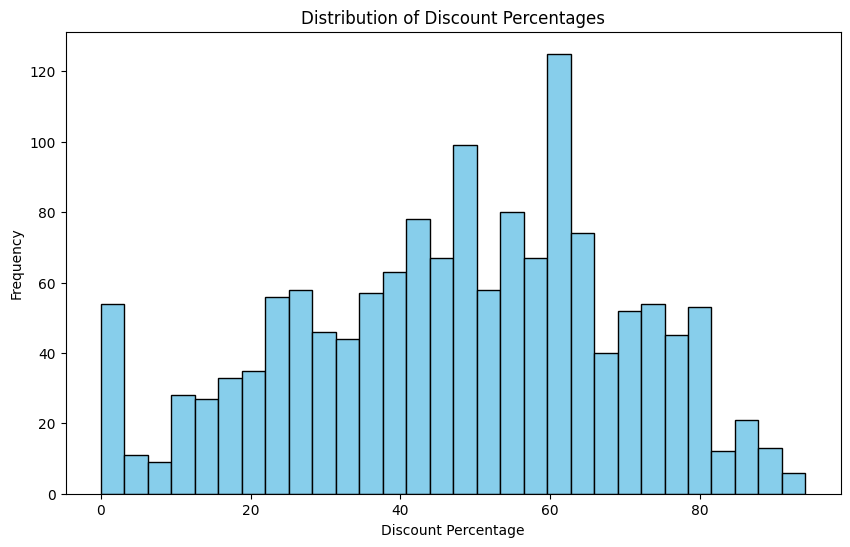

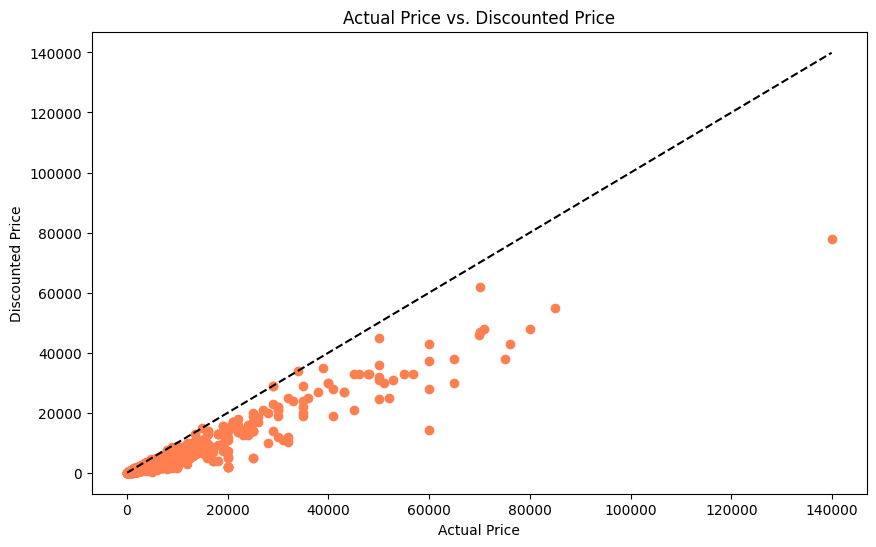

In [ ]:
import matplotlib.pyplot as plt

# 1. Histogram of discount percentages
plt.figure(figsize=(10, 6))
plt.hist(df['discount_percentage'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')

# 2. Scatter plot of actual vs. discounted prices
plt.figure(figsize=(10, 6))
plt.scatter(df['actual_price'], df['discounted_price'], color='coral')
plt.plot([df['actual_price'].min(), df['actual_price'].max()], [df['actual_price'].min(), df['actual_price'].max()], color='black', linestyle='--') # Diagonal line
plt.title('Actual Price vs. Discounted Price')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')

plt.show()

###4.How does the average discount percentage vary across categories?

<ipython-input-6-24dd09d58cf6>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


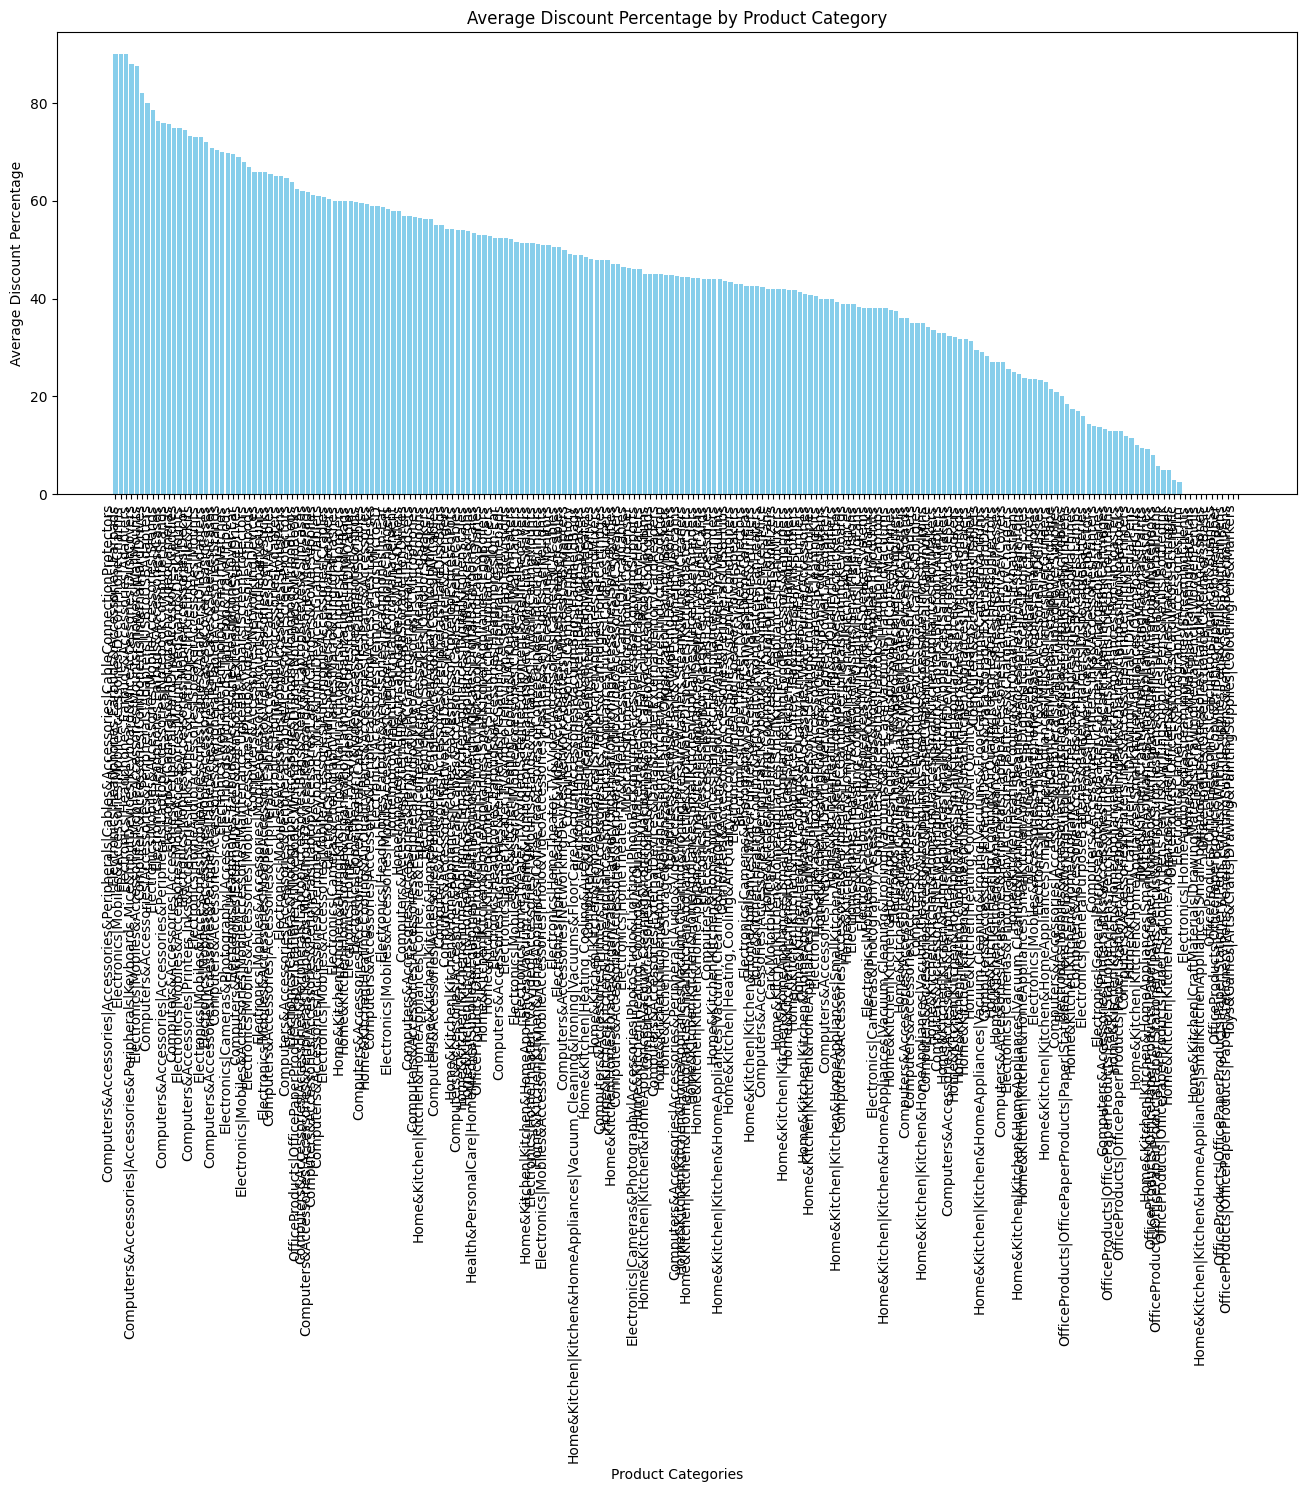

In [ ]:
import matplotlib.pyplot as plt

# Sort the categories by average discount percentage in descending order
average_discounts_sorted = average_discounts.sort_values(by='average_discount_percentage', ascending=False)

plt.figure(figsize=(16, 6))  # Adjust figure size for better readability
plt.bar(average_discounts_sorted['category'], average_discounts_sorted['average_discount_percentage'], color='skyblue')
plt.xlabel("Product Categories")
plt.ylabel("Average Discount Percentage")
plt.title("Average Discount Percentage by Product Category")
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig("average_discount_by_category.png")
plt.show()

###5.What are the most popular product names?

<ipython-input-5-73980b2afabd>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent labels from overlapping


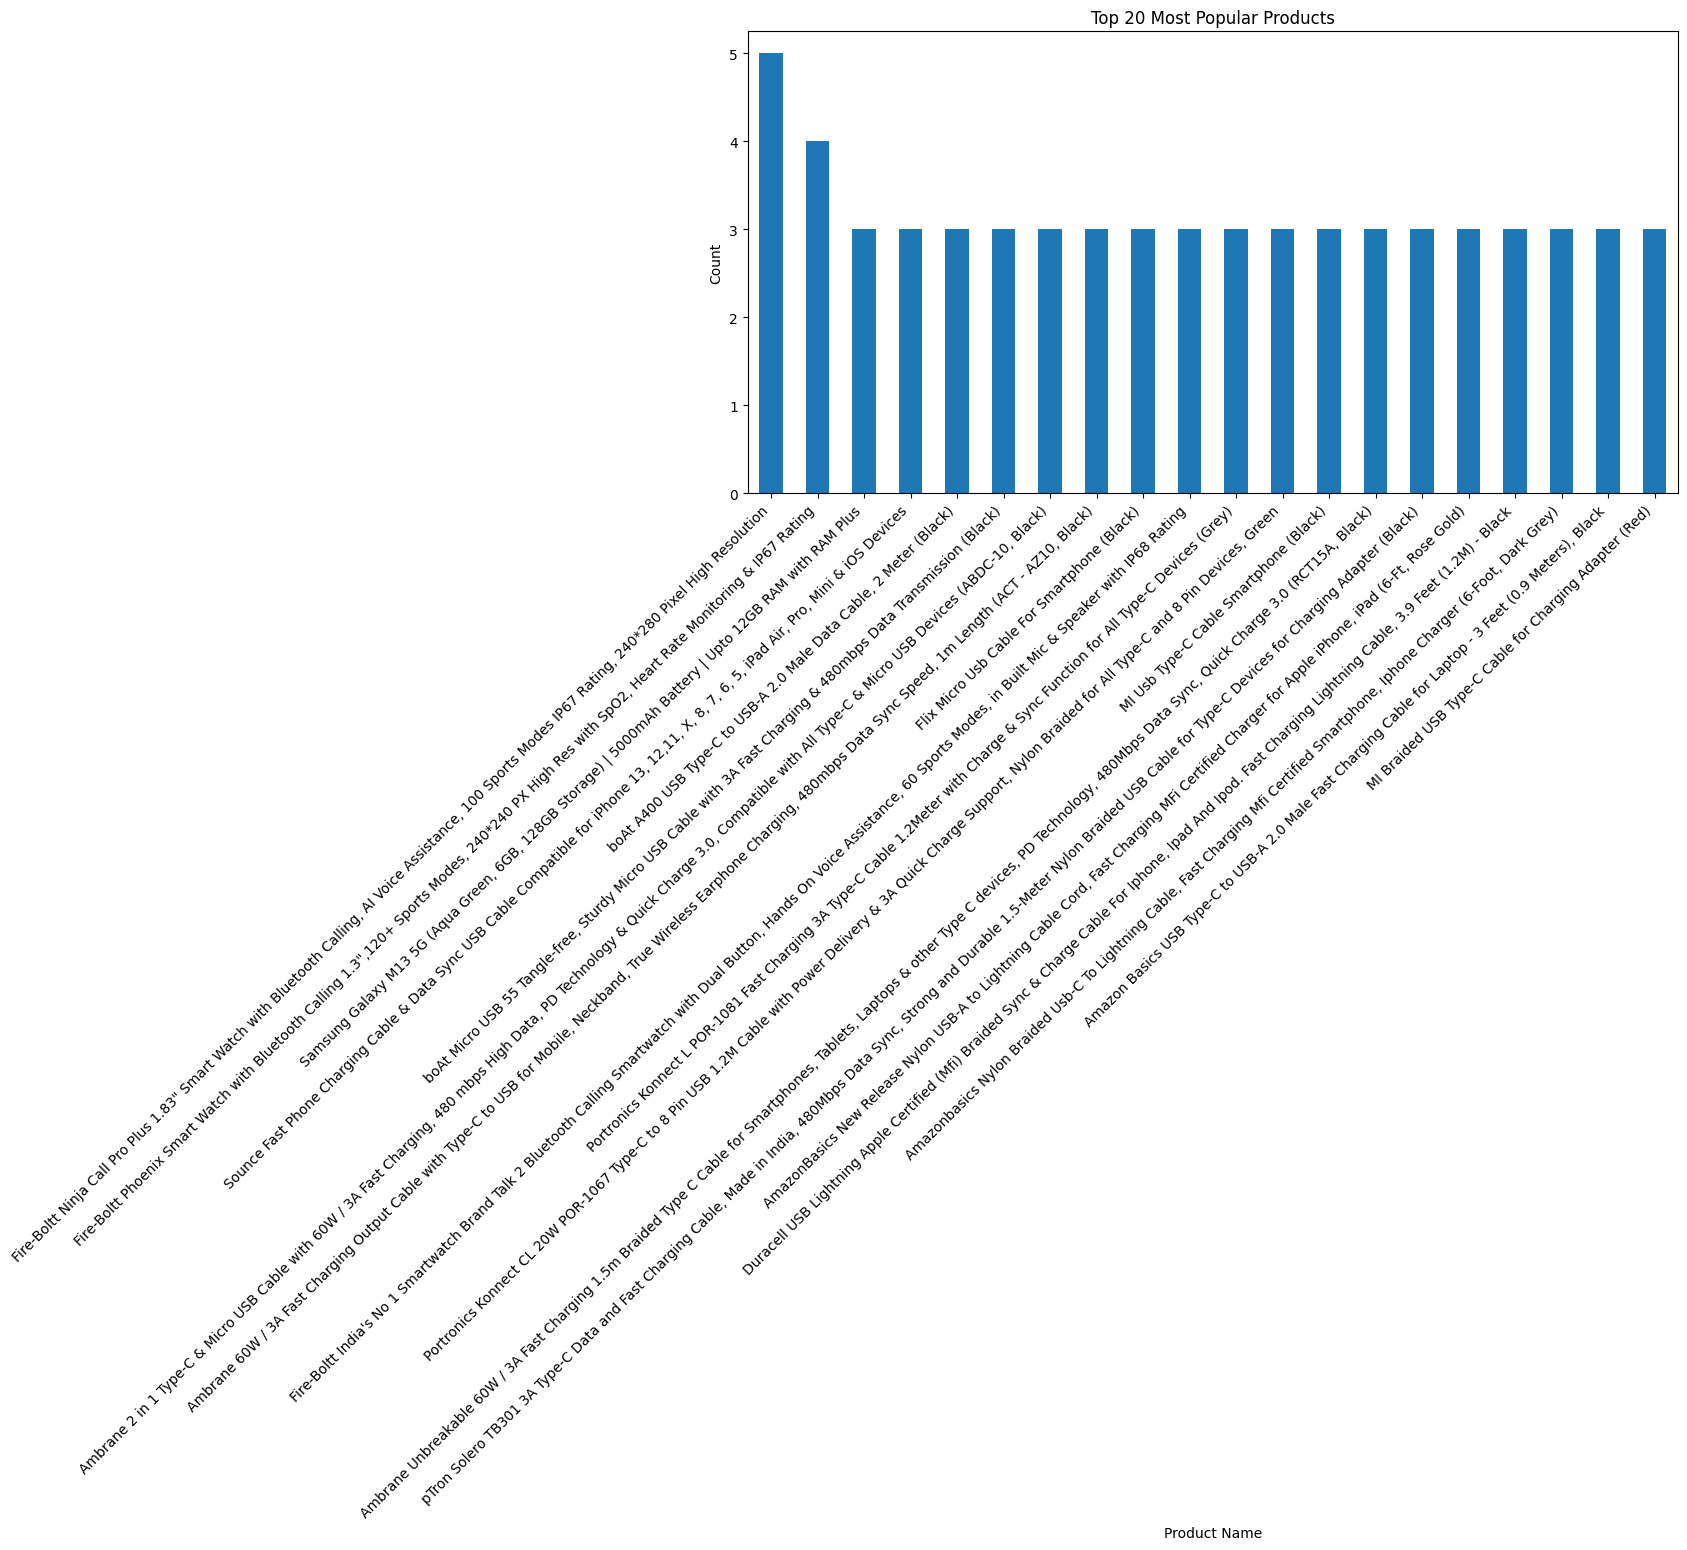

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
product_popularity.head(20).plot(kind='bar')
plt.xlabel("Product Name")
plt.ylabel("Count")
plt.title("Top 20 Most Popular Products")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.savefig("top_20_products.png")
plt.show()

###6.What are the most popular product keywords?

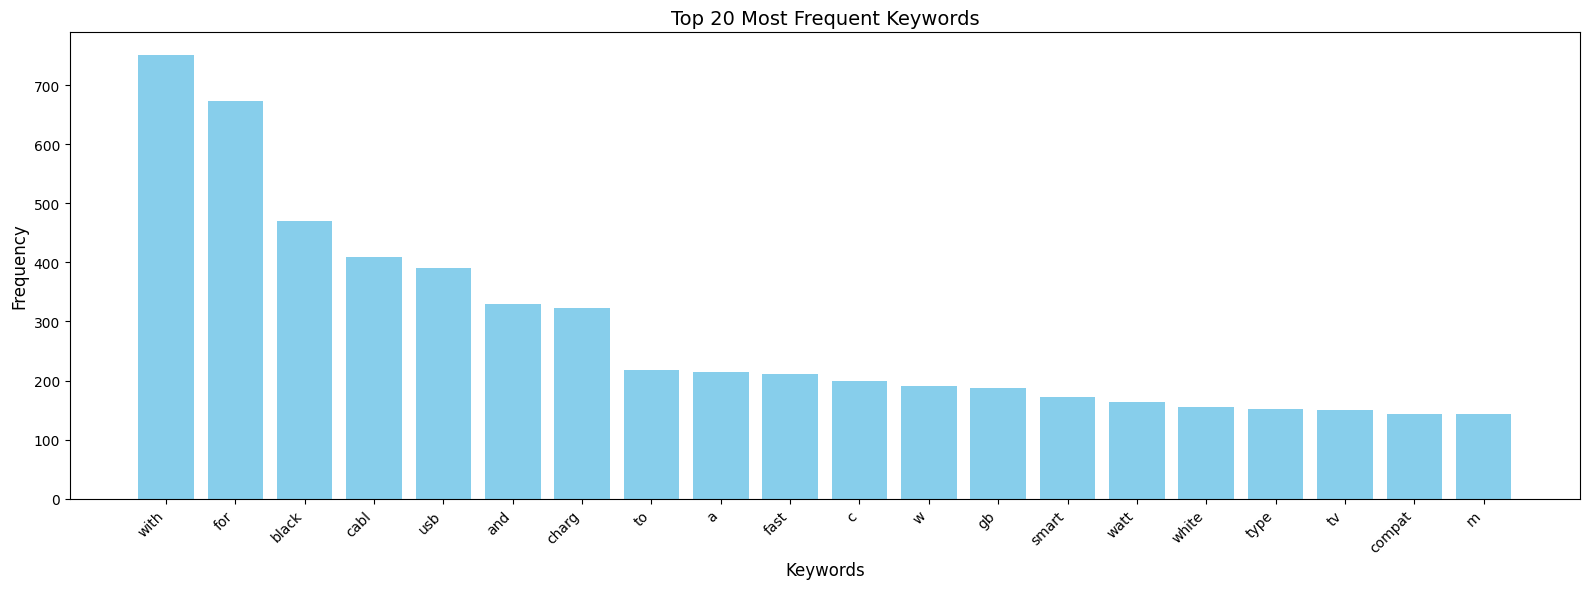

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.bar(top_keywords_dict.keys(), top_keywords_dict.values(), color='skyblue')
plt.xlabel("Keywords", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Top 20 Most Frequent Keywords", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###7.What are the most popular product reviews?

NameError: name 'top_10_rating' is not defined

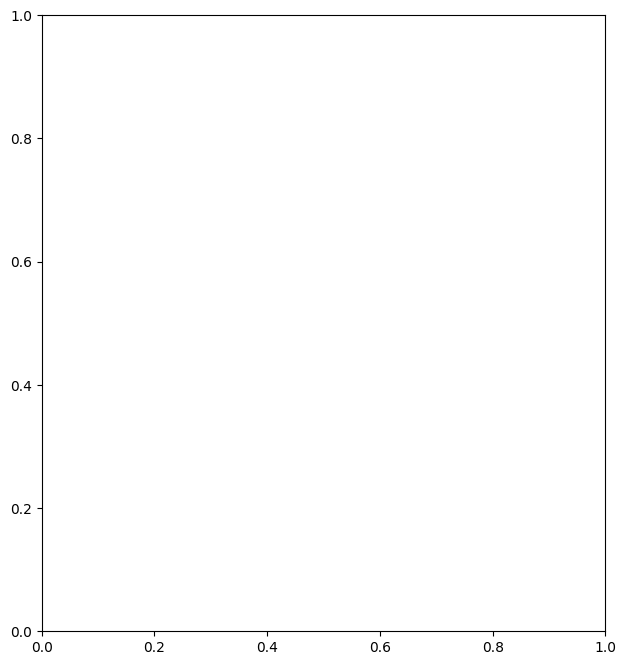

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.bar(top_10_rating['product_name'], top_10_rating['avg_rating'], color='skyblue')
plt.xlabel("Product Name")
plt.ylabel("Average Rating")
plt.title("Top 10 Products by Average Rating")
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(top_10_review_length['product_name'], top_10_review_length['avg_review_length'], color='lightcoral')
plt.xlabel("Product Name")
plt.ylabel("Average Review Length")
plt.title("Top 10 Products by Average Review Length")
plt.xticks(rotation=45, ha='right')

plt.suptitle("Top 10 Products by Average Rating and Review Length", fontsize=16) # Super title
plt.subplots_adjust(bottom=0.2) # Adjust bottom margin
plt.show()

###8. What is the correlation between discounted_price and rating?

       discounted_price       rating
count       1465.000000  1465.000000
mean        1472.065823     4.096587
std         1508.698409     0.291574
min           39.000000     2.000000
25%          325.000000     4.000000
50%          799.000000     4.100000
75%         1999.000000     4.300000
max         4510.000000     5.000000

Missing values:
discounted_price    0
rating              0
dtype: int64


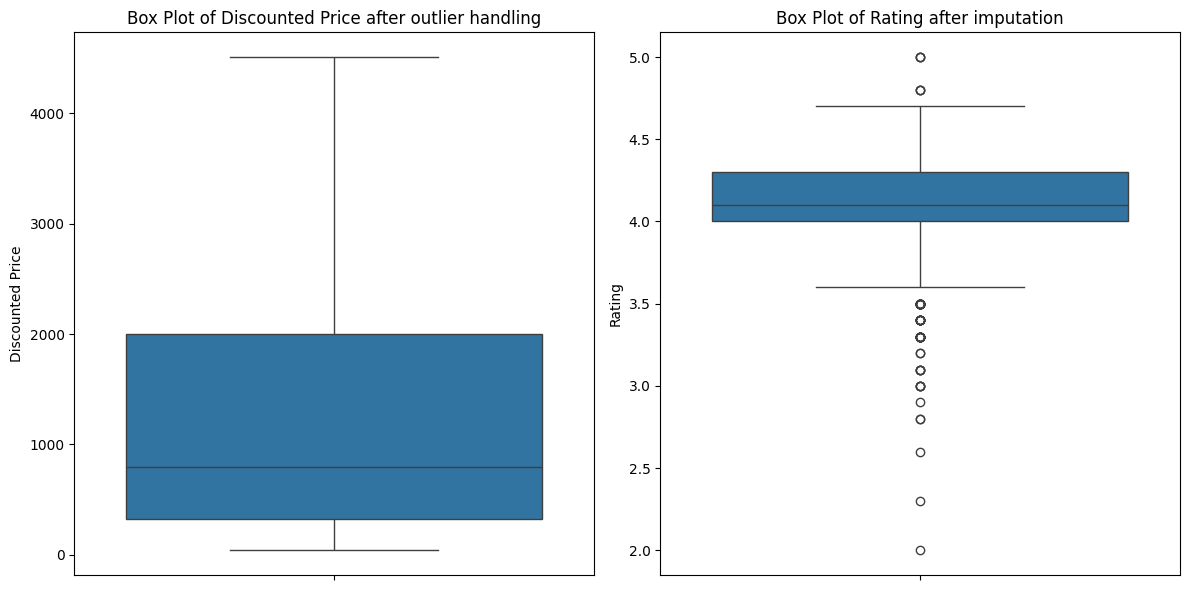

In [ ]:
# Impute missing 'rating' with the median
median_rating = df['rating'].median()
df['rating'] = df['rating'].fillna(median_rating)

# Outlier handling for 'discounted_price' using IQR
Q1 = df['discounted_price'].quantile(0.25)
Q3 = df['discounted_price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
df['discounted_price'] = df['discounted_price'].apply(lambda x: upper_bound if x > upper_bound else x)


# Verify the cleaning
print(df[['discounted_price', 'rating']].describe())
print("\nMissing values:")
print(df[['discounted_price', 'rating']].isnull().sum())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['discounted_price'])
plt.title('Box Plot of Discounted Price after outlier handling')
plt.ylabel('Discounted Price')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['rating'])
plt.title('Box Plot of Rating after imputation')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()

###9. What are the Top 5 categories based on the highest rating?

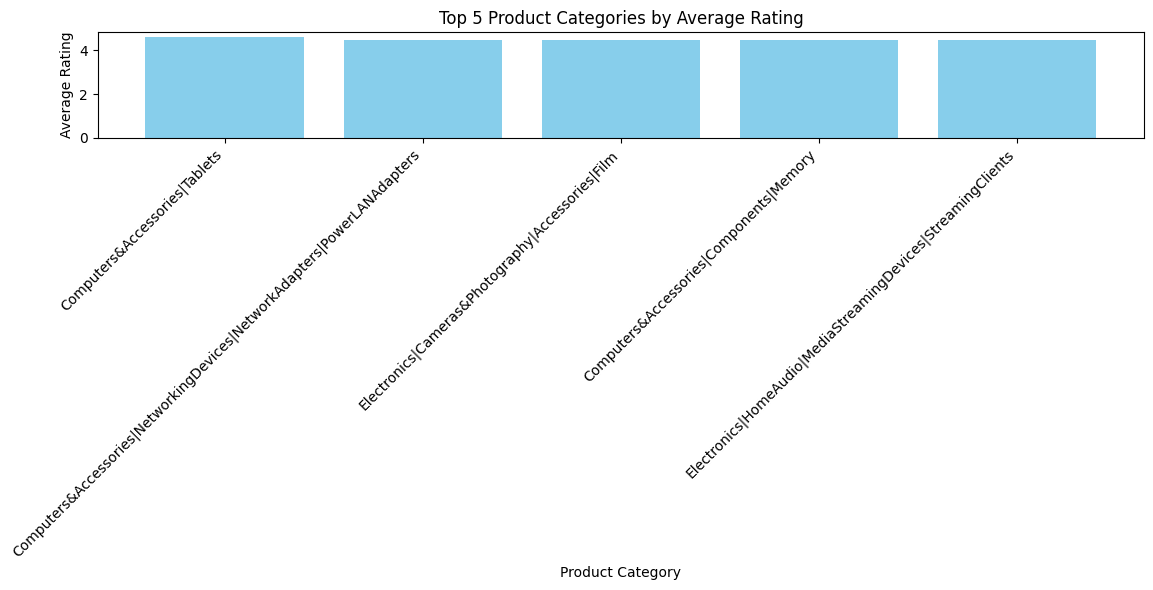

In [ ]:
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
plt.bar(top_5_categories.index, top_5_categories['average_rating'], color='skyblue')
plt.xlabel("Product Category")
plt.ylabel("Average Rating")
plt.title("Top 5 Product Categories by Average Rating")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

###10.' Identify any potential areas for improvement or optimization based on the data analysis?

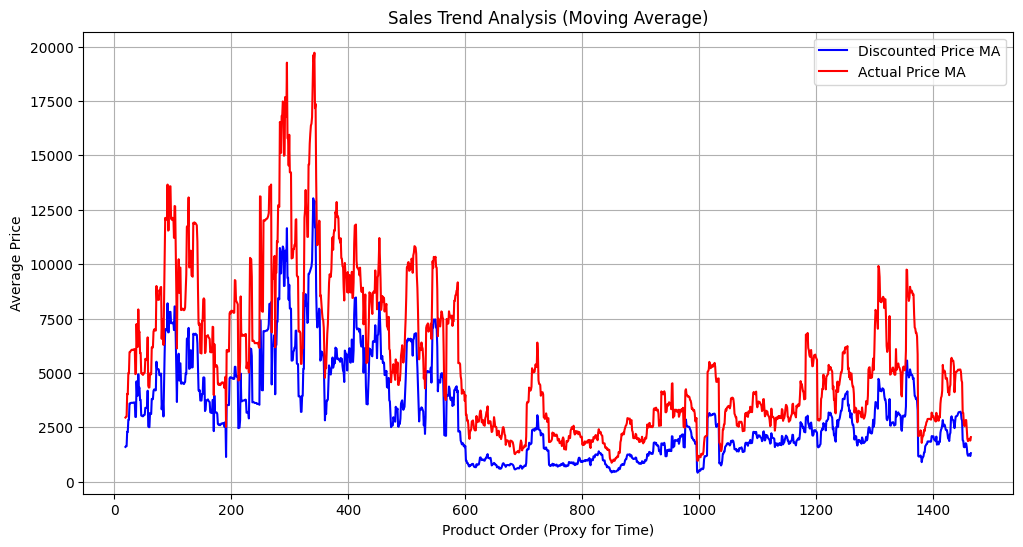

<ipython-input-5-1fab420714d7>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products['rating'], palette="viridis")
<ipython-input-5-1fab420714d7>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_products.index, y=bottom_products['rating'], palette="magma")
<ipython-input-5-1fab420714d7>:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


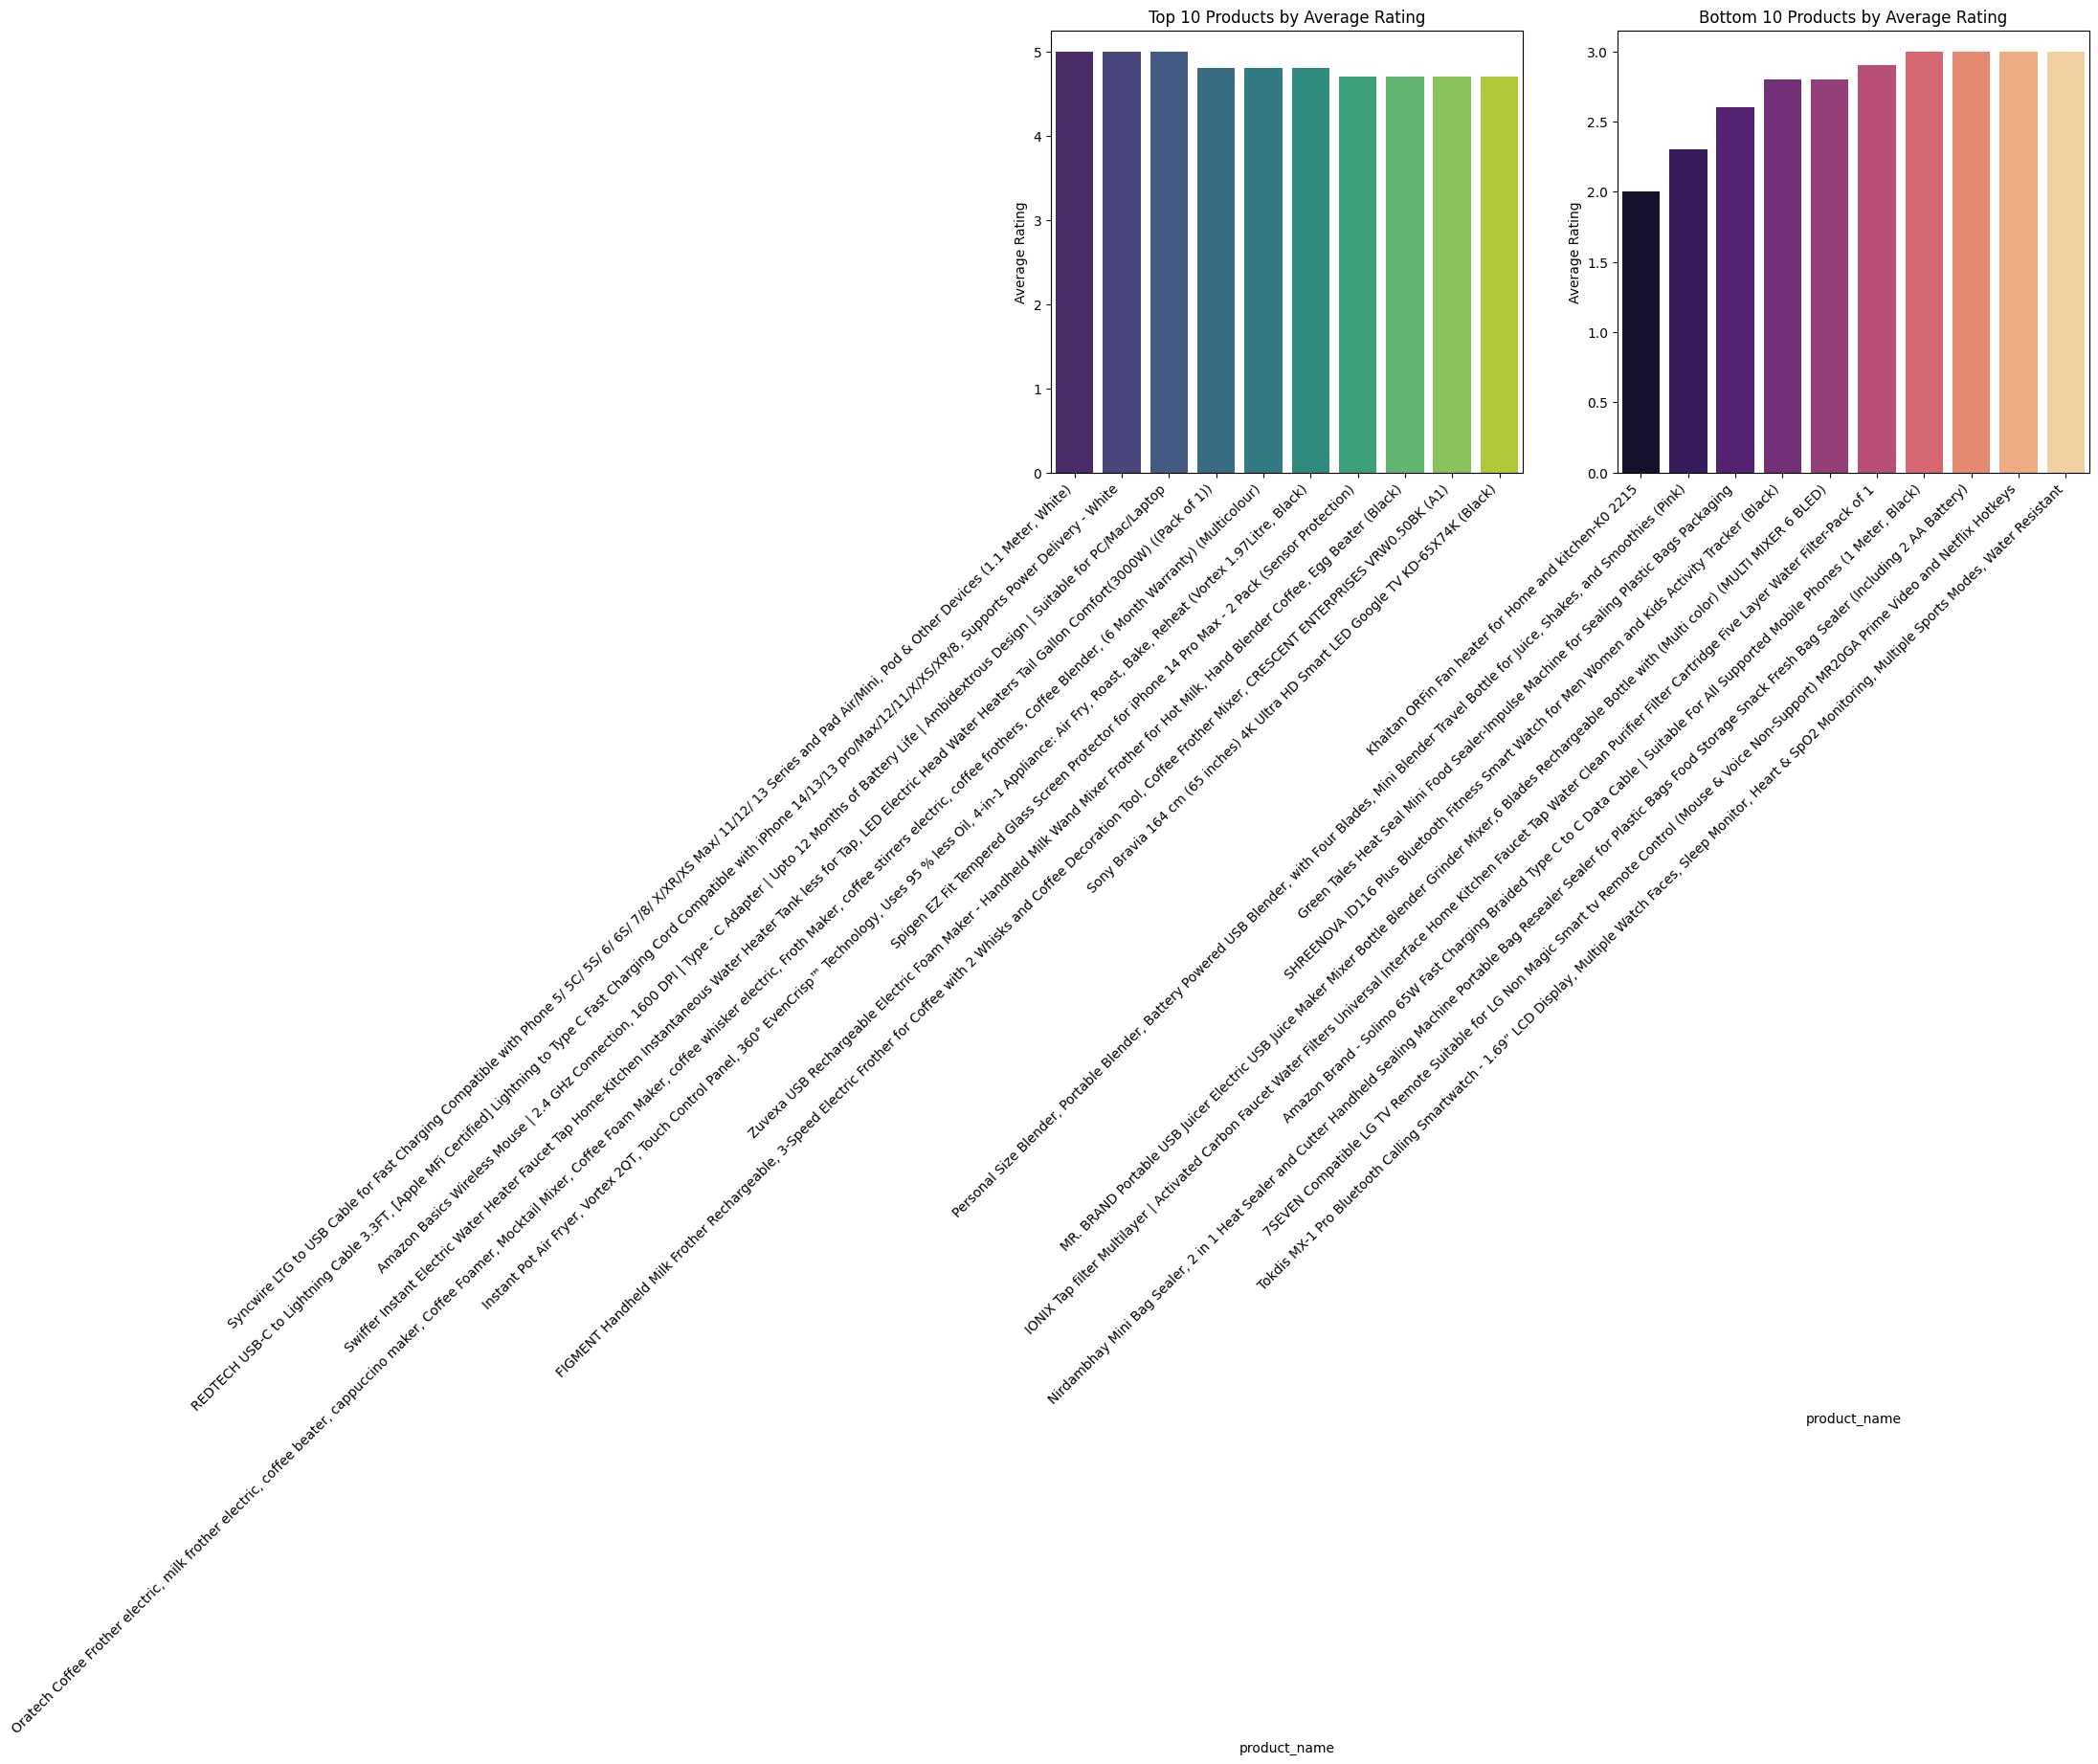

<ipython-input-5-1fab420714d7>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products['rating_count'], palette="viridis")
<ipython-input-5-1fab420714d7>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_products.index, y=bottom_products['rating_count'], palette="magma")
<ipython-input-5-1fab420714d7>:51: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


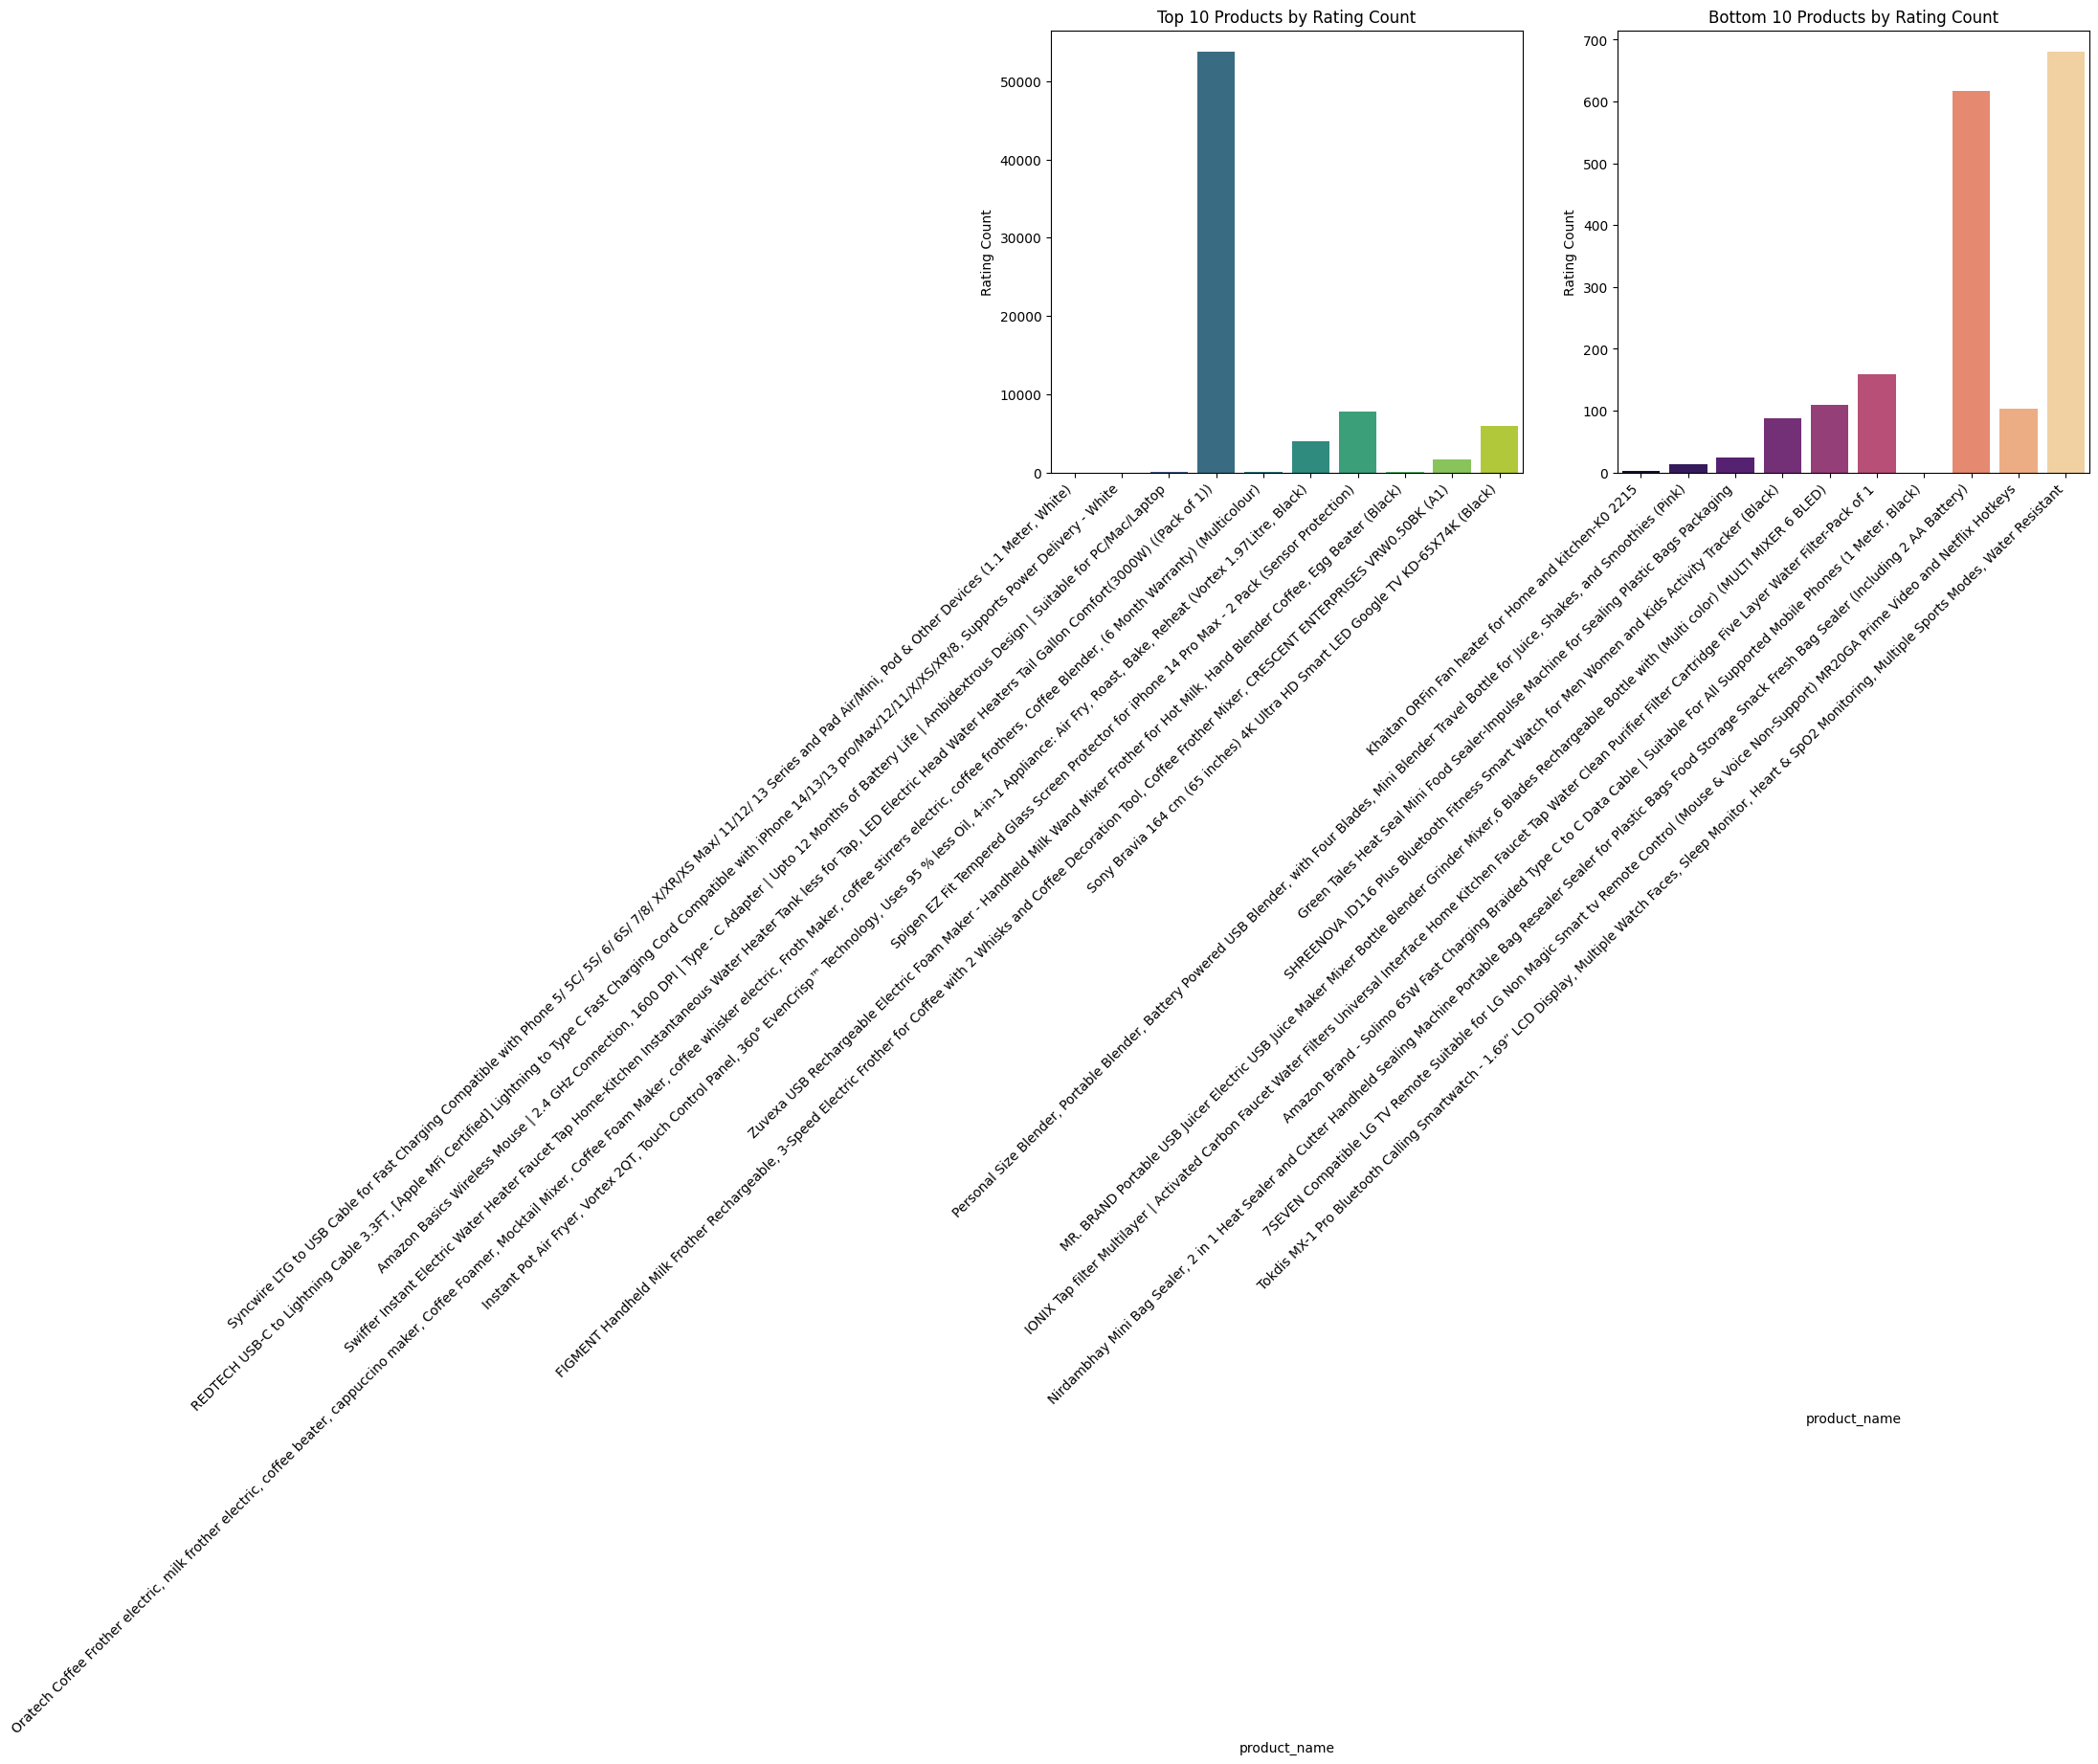

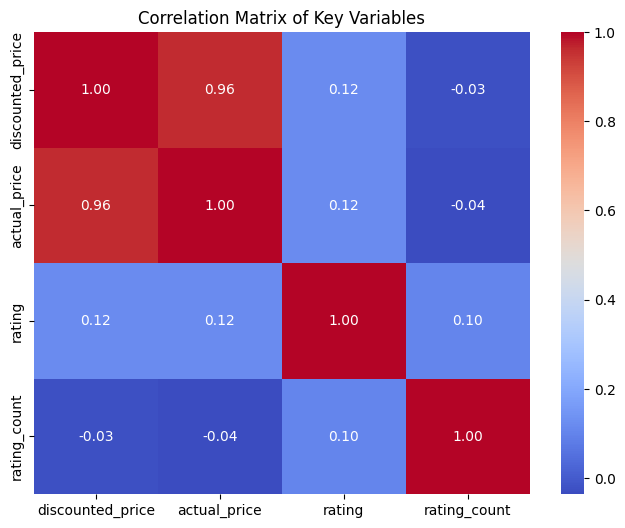

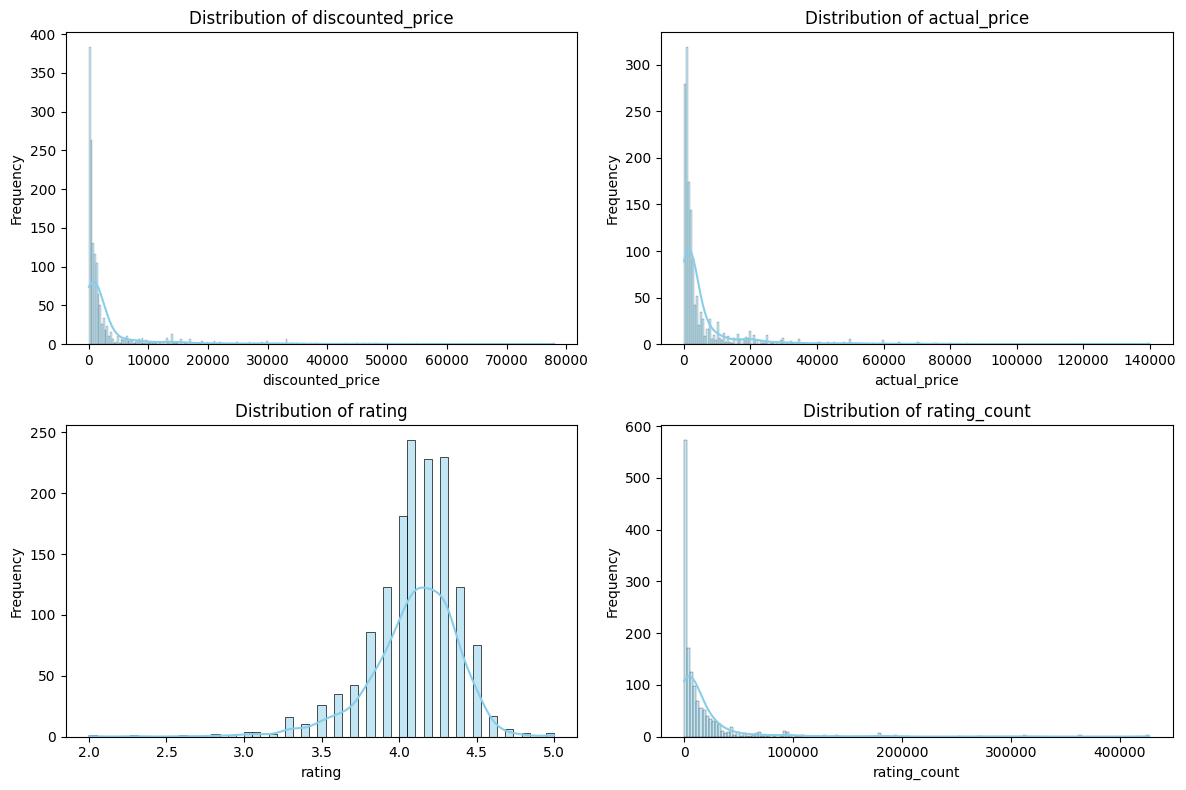

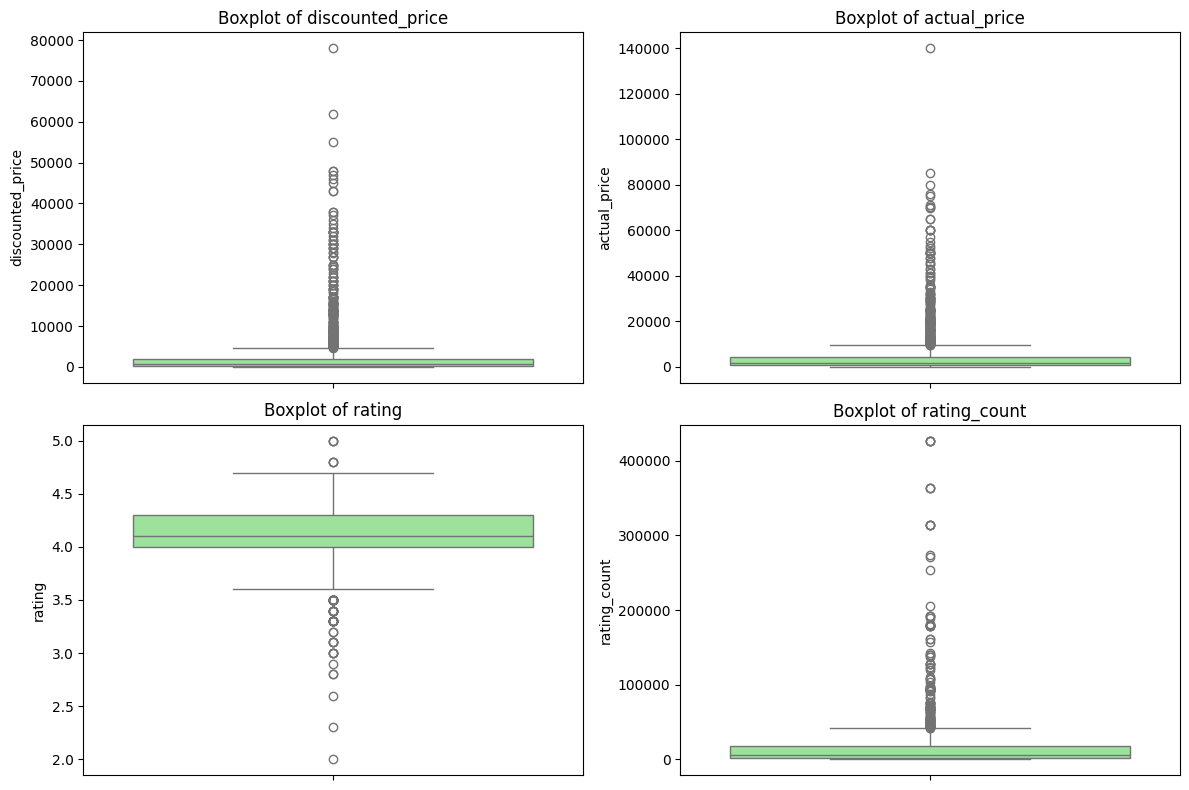

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales Trend Visualization
plt.figure(figsize=(12, 6))
plt.plot(df_amazon['order'], df_amazon['discounted_price_ma'], label='Discounted Price MA', color='blue')
plt.plot(df_amazon['order'], df_amazon['actual_price_ma'], label='Actual Price MA', color='red')
plt.xlabel('Product Order (Proxy for Time)')
plt.ylabel('Average Price')
plt.title('Sales Trend Analysis (Moving Average)')
plt.legend()
plt.grid(True)
plt.show()


# Product Performance Visualization
product_performance = df_amazon.groupby('product_name').agg({'rating': 'mean', 'rating_count': 'sum'})
top_products = product_performance.sort_values('rating', ascending=False).head(10)
bottom_products = product_performance.sort_values('rating').head(10)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=top_products.index, y=top_products['rating'], palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Products by Average Rating')
plt.ylabel('Average Rating')

plt.subplot(1, 2, 2)
sns.barplot(x=bottom_products.index, y=bottom_products['rating'], palette="magma")
plt.xticks(rotation=45, ha='right')
plt.title('Bottom 10 Products by Average Rating')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=top_products.index, y=top_products['rating_count'], palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Products by Rating Count')
plt.ylabel('Rating Count')

plt.subplot(1, 2, 2)
sns.barplot(x=bottom_products.index, y=bottom_products['rating_count'], palette="magma")
plt.xticks(rotation=45, ha='right')
plt.title('Bottom 10 Products by Rating Count')
plt.ylabel('Rating Count')

plt.tight_layout()
plt.show()


# Correlation Matrix Visualization
correlation_matrix = df_amazon[['discounted_price', 'actual_price', 'rating', 'rating_count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Variables')
plt.show()

# Distribution of Key Variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(['discounted_price', 'actual_price', 'rating', 'rating_count']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_amazon[col].dropna(), kde=True, color="skyblue")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, col in enumerate(['discounted_price', 'actual_price', 'rating', 'rating_count']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df_amazon[col], color="lightgreen")
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

#**EDA 4**⭐

###1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful?
>No missing values were found.
Are there any duplicate rows in the dataset? Yes, there were 27 duplicate rows, which were subsequently removed.
#Data Analysis Key Findings
Data Dimensions: The initial dataset contained 440 rows and 5 columns.
Duplicate Rows: 27 duplicate rows were identified and removed, resulting in a cleaned dataset with 413 rows.
No Missing Values: No missing values were detected in any of the columns after the initial data load.
Popularity Range: The popularity score of the songs ranges from 29 to 97, with an average around 76.
Duration Range: Song durations range from 81,666 ms to 501,648 ms, averaging approximately 206,810 ms.

###2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?


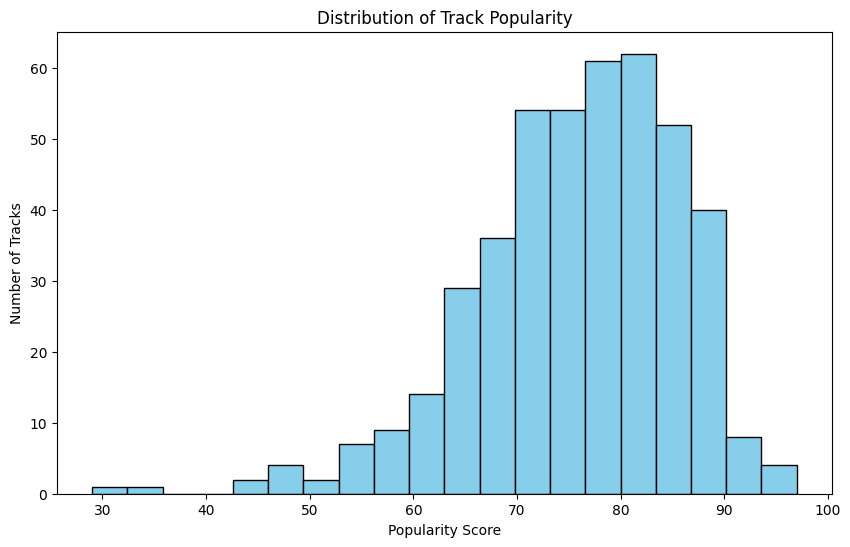

In [ ]:
import matplotlib.pyplot as plt

# Create the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.hist(df_spotify['Popularity'], bins=20, color='skyblue', edgecolor='black') # Use 20 bins for better granularity
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Track Popularity')
plt.show()

###3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?

       Popularity  Duration (ms)
count  440.000000     440.000000
mean    75.736364  206810.040909
std      9.886534   53576.930289
min     29.000000   81666.000000
25%     70.000000  172778.500000
50%     77.000000  201866.000000
75%     83.000000  235119.750000
max     97.000000  501648.000000


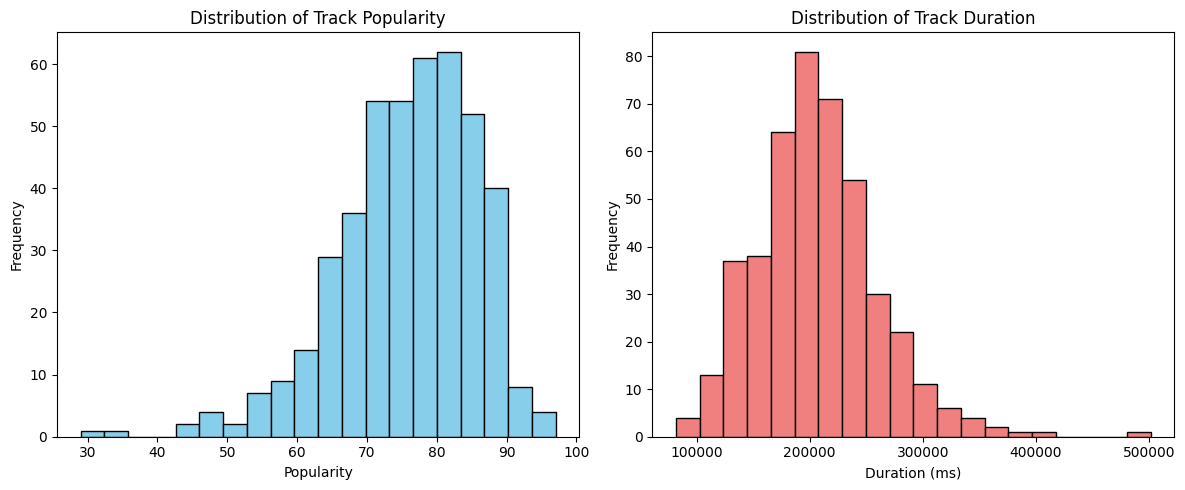


Missing Values:
Popularity       0
Duration (ms)    0
dtype: int64

Correlation between Popularity and Duration: 0.040744872170752594


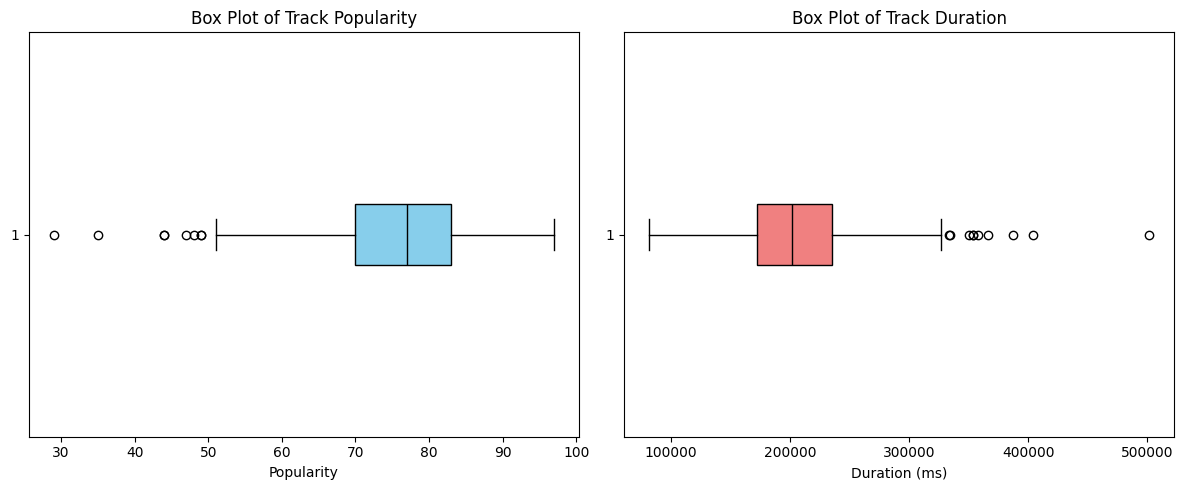

In [ ]:
import matplotlib.pyplot as plt

# Descriptive statistics
print(df_spotify[['Popularity', 'Duration (ms)']].describe())

# Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df_spotify['Popularity'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Track Popularity')

plt.subplot(1, 2, 2)
plt.hist(df_spotify['Duration (ms)'], bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.title('Distribution of Track Duration')
plt.tight_layout()
plt.show()

# Missing values
print("\nMissing Values:")
print(df_spotify[['Popularity', 'Duration (ms)']].isnull().sum())

# Correlation
correlation = df_spotify['Popularity'].corr(df_spotify['Duration (ms)'])
print(f"\nCorrelation between Popularity and Duration: {correlation}")

# Box plots to visualize outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df_spotify['Popularity'], vert=False, patch_artist=True, showfliers=True,
            boxprops=dict(facecolor='skyblue'),
            medianprops=dict(color='black'))
plt.xlabel('Popularity')
plt.title('Box Plot of Track Popularity')

plt.subplot(1, 2, 2)
plt.boxplot(df_spotify['Duration (ms)'], vert=False, patch_artist=True, showfliers=True,
            boxprops=dict(facecolor='lightcoral'),
            medianprops=dict(color='black'))
plt.xlabel('Duration (ms)')
plt.title('Box Plot of Track Duration')

plt.tight_layout()
plt.show()

###4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot?


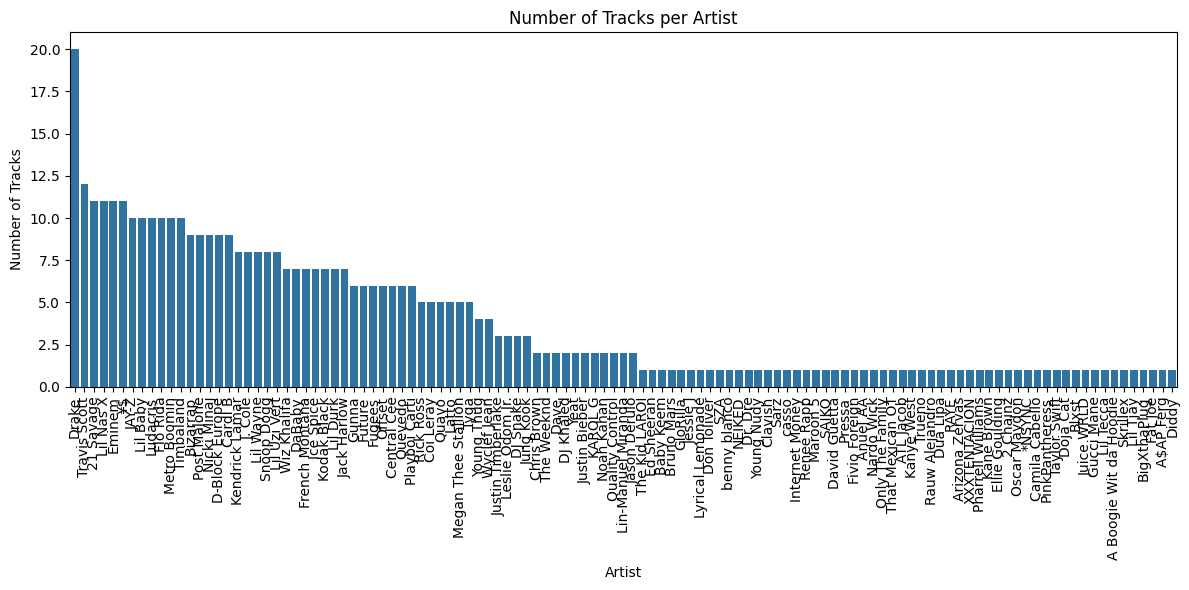

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if the DataFrame is empty before proceeding
if not df.empty:
    plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
    sns.countplot(x='Artist', data=df, order=df['Artist'].value_counts().index)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.title('Number of Tracks per Artist')
    plt.xlabel('Artist')
    plt.ylabel('Number of Tracks')
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()
else:
    print("The DataFrame is empty. Cannot create the countplot.")

###5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?
>The top 5 least popular tracks are:

>Pressa - Attachments (feat. Coi Leray)
>Justin Bieber - Intentions
>French Montana - Splash Brothers
>French Montana - Splash Brothers
>Lil Baby - On Me - Remix

###6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist?


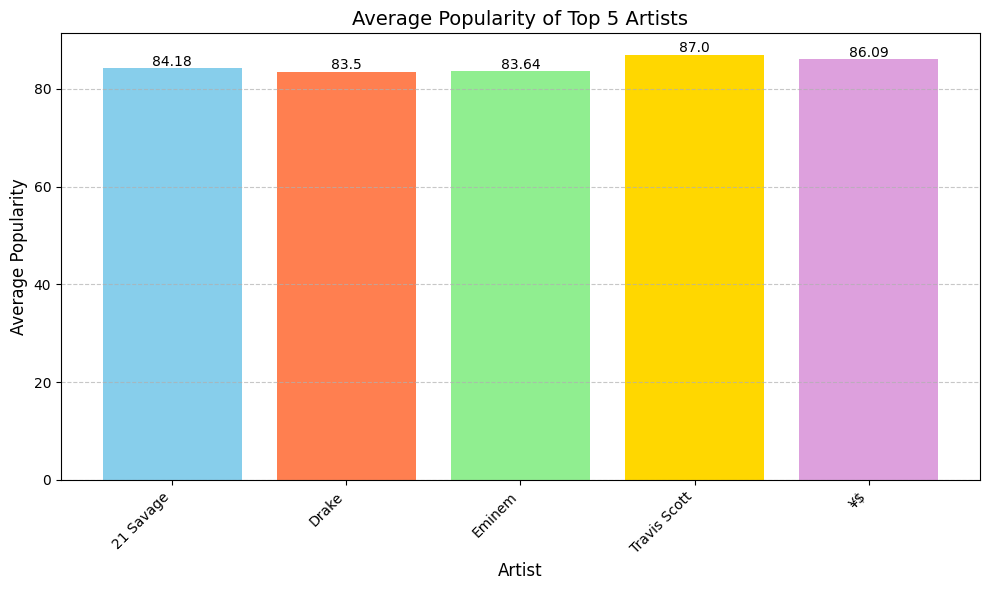

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(average_popularity.index, average_popularity.values, color=['skyblue', 'coral', 'lightgreen', 'gold', 'plum'])
plt.xlabel("Artist", fontsize=12)
plt.ylabel("Average Popularity", fontsize=12)
plt.title("Average Popularity of Top 5 Artists", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

# Add value labels above each bar
for i, v in enumerate(average_popularity.values):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center', fontsize=10)

plt.tight_layout()
plt.savefig("average_popularity_chart.png")
plt.show()

###7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?

In [ ]:
op_tracks = []
for artist in top5_artists['Artist']:
    artist_tracks = df_spotify[df_spotify['Artist'] == artist]
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]
    top_tracks.append((artist, most_popular_track['Track Name']))

for artist, track in top_tracks:
    print(f"Artist: {artist}, Most Popular Track: {track}")

Artist: Drake, Most Popular Track: Rich Baby Daddy (feat. Sexyy Red & SZA)
Artist: Travis Scott, Most Popular Track: FE!N (feat. Playboi Carti)
Artist: ¥$, Most Popular Track: CARNIVAL
Artist: 21 Savage, Most Popular Track: redrum
Artist: Eminem, Most Popular Track: Without Me
Artist: Drake, Most Popular Track: Rich Baby Daddy (feat. Sexyy Red & SZA)
Artist: Travis Scott, Most Popular Track: FE!N (feat. Playboi Carti)
Artist: ¥$, Most Popular Track: CARNIVAL
Artist: 21 Savage, Most Popular Track: redrum
Artist: Eminem, Most Popular Track: Without Me


###8.Visualize relationships between multiple numerical variables simultaneously using a pair plot?

Missing values in numerical columns:
Popularity       0
Duration (ms)    0
dtype: int64

Data types of numerical columns:
Popularity       int64
Duration (ms)    int64
dtype: object

Descriptive statistics of numerical columns:
       Popularity  Duration (ms)
count  440.000000     440.000000
mean    75.736364  206810.040909
std      9.886534   53576.930289
min     29.000000   81666.000000
25%     70.000000  172778.500000
50%     77.000000  201866.000000
75%     83.000000  235119.750000
max     97.000000  501648.000000


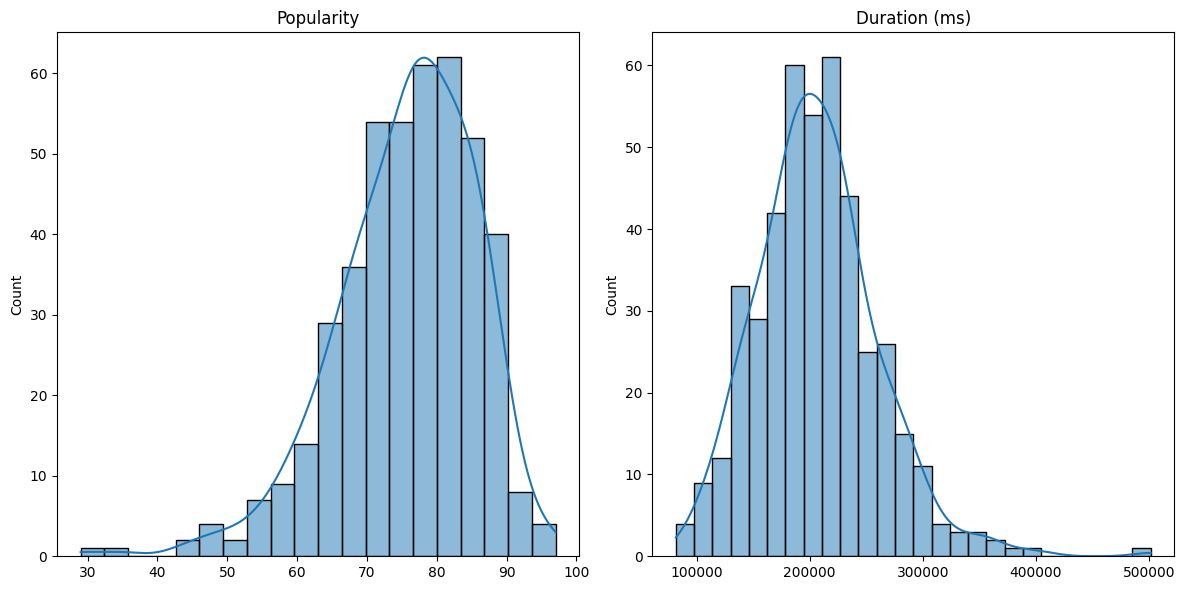

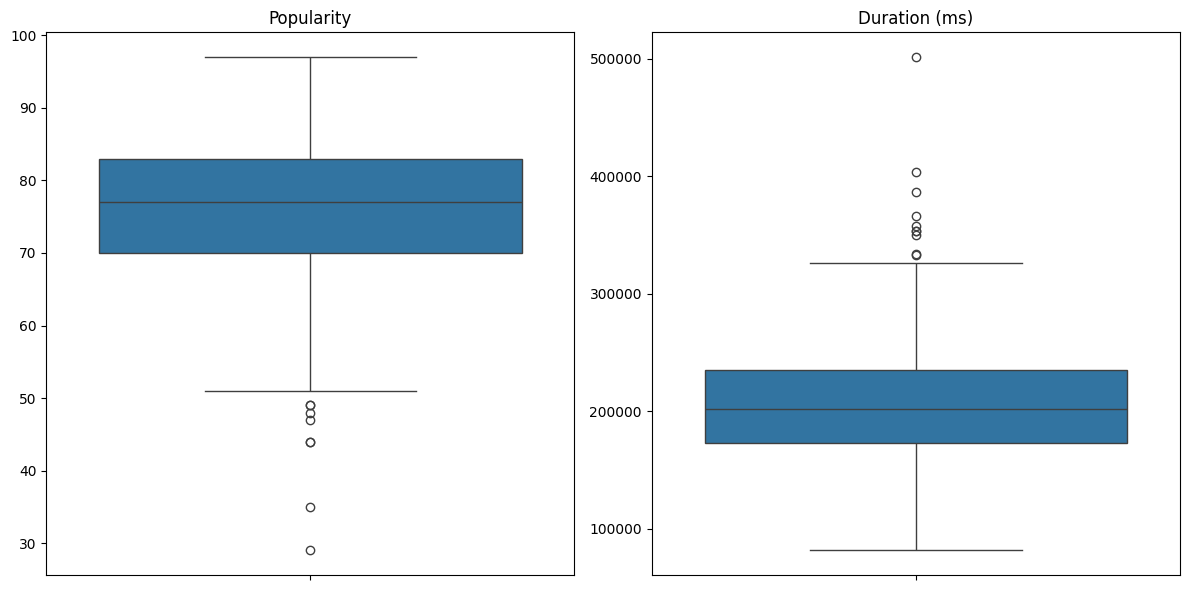

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns
numerical_cols = df_spotify.select_dtypes(include=['number']).columns

# Check for missing values
print("Missing values in numerical columns:")
print(df_spotify[numerical_cols].isnull().sum())

# Examine data types
print("\nData types of numerical columns:")
print(df_spotify[numerical_cols].dtypes)

# Calculate descriptive statistics
print("\nDescriptive statistics of numerical columns:")
print(df_spotify[numerical_cols].describe())

# Visualize distributions
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.histplot(df_spotify[col], kde=True)
    plt.title(col)
    plt.xlabel('')  # Remove x-axis labels
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(y=df_spotify[col])
    plt.title(col)
    plt.ylabel('')  # Remove y-axis labels
plt.tight_layout()
plt.show()

###9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot?


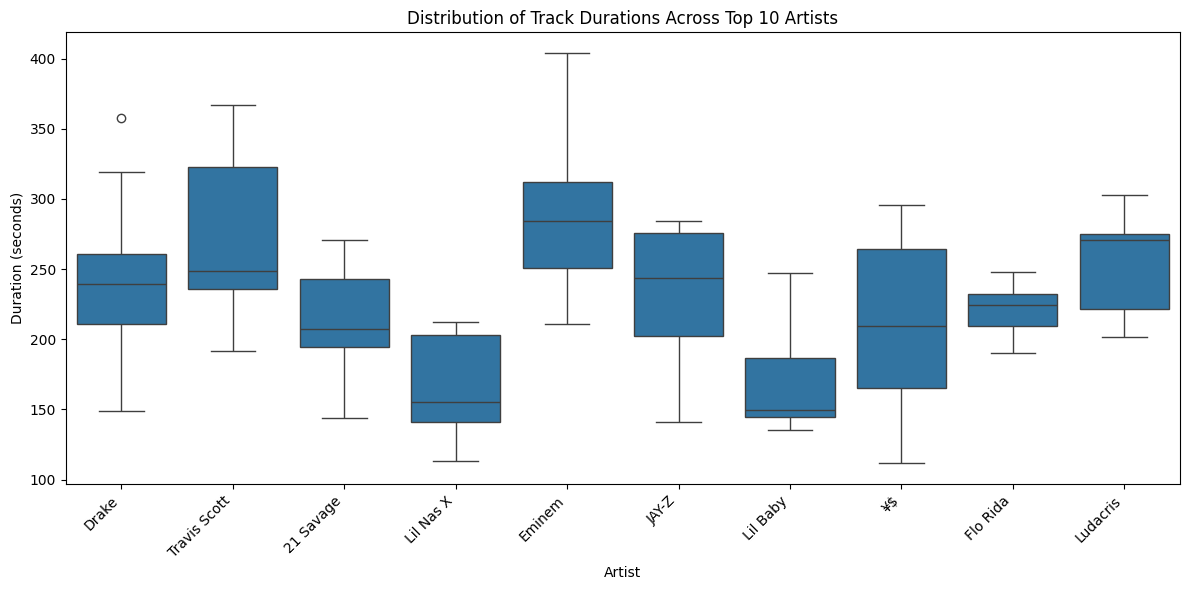

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 artists for visualization
top_artists = df_spotify['Artist'].value_counts().nlargest(10).index
df_top_artists = df_spotify[df_spotify['Artist'].isin(top_artists)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (s)', data=df_top_artists)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Artist')
plt.ylabel('Duration (seconds)')
plt.title('Distribution of Track Durations Across Top 10 Artists')
plt.tight_layout()
plt.show()

###10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot?


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be plac

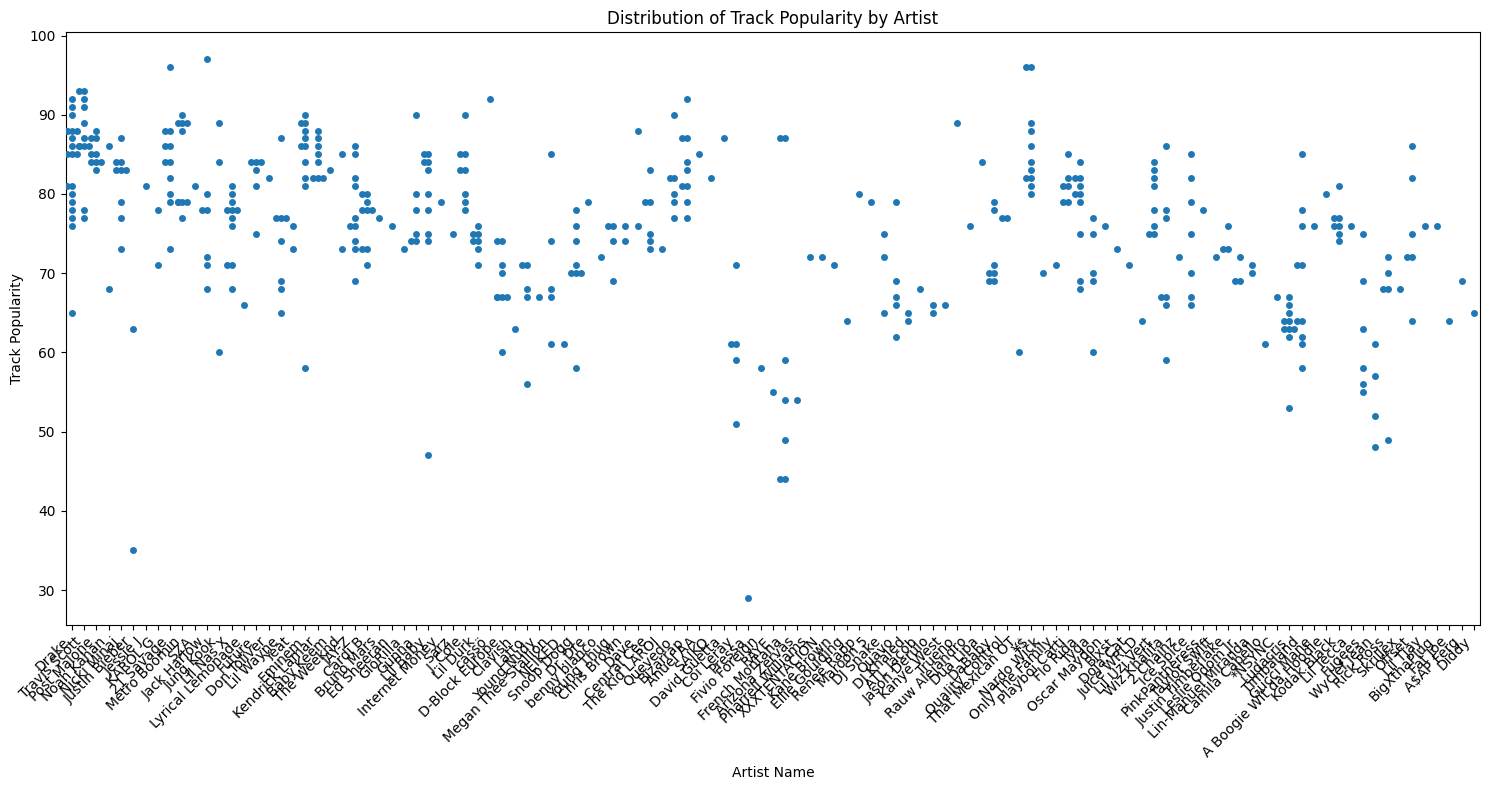

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))  # Adjust figure size
sns.swarmplot(x='artist_name', y='track_popularity', data=df)
plt.title('Distribution of Track Popularity by Artist')
plt.xlabel('Artist Name')
plt.ylabel('Track Popularity')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()